<a href="https://colab.research.google.com/github/dan-k-89/Personality-Type-Classification/blob/main/Personality%20Type%20Classification%20using%20Recurrent%20Neural%20Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2022 COMP5046 Assignment 1


# Readme
For most of the cells, I have set a variable and if/else statmement to allow for the data saved on my GoogleDrive to be loaded. Please change to False if you would like to have the cell pre-process/train etc. 

***Visualising the comparison of different results is a good way to justify your decision.***

# 1 - Data Preprocessing

## 1.0. Data Collection [DO NOT MODIFY THIS]

In [ ]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '16g474hdNsaNx0_SnoKuqj2BuwSEGdnbt'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('training_data.csv')  

id = '1-7hj0sF3Rc5G6POKdkpbDXm_Q6BWFDPU'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('testing_data.csv')  

import pandas as pd
training_data = pd.read_csv("/content/training_data.csv")
testing_data = pd.read_csv("/content/testing_data.csv")

print("------------------------------------")
print("Size of training dataset: {0}".format(len(training_data)))
print("Size of testing dataset: {0}".format(len(testing_data)))
print("------------------------------------")

print("------------------------------------")
print("Sample Data")
print("LABEL: {0} / SENTENCE: {1}".format(training_data.iloc[-1,0], training_data.iloc[-1,1]))
print("------------------------------------")


------------------------------------
Size of training dataset: 7808
Size of testing dataset: 867
------------------------------------
------------------------------------
Sample Data
LABEL: F / SENTENCE: 'Half of it is going straight to charity, another quarter going straight to scientific research, an eighth to the parkour community, a sixteenth to towards spreading information about health and...|||Find a path or suffer more.|||http://personalitycafe.com/enneagram-personality-theory-forum/85323-enneagram-type-mbti-type-compared-statistics.html yep.|||I kind of anchor on Fi and Ne makes having Ni really fun. INFP for me as they tire me out less and our views tend to align more.|||The two ESTPs I have gotten the chance to know seem to experience much more than other people who have been on the planet for the same amount of time and are quite the renaissance (wo)men.  Is this...|||I don't really have a best friend ISTP(passion-amateur group co-founder), INTJ(intellectual and various sma

In [ ]:
# Preview of the data in the csv file, which has two columns: 
# (1)type - label of the post (2)posts - the corresponding post content
training_data.head()

,type,posts
0,F,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,T,'I'm finding the lack of me in these posts ver...
2,T,'Good one _____ https://www.youtube.com/wat...
3,T,"'Dear INTP, I enjoyed our conversation the o..."
4,T,'You're fired.|||That's another silly misconce...


In [ ]:
# Extract the labels and posts and store into List

# Get the list of training data (posts)
training_posts=training_data['posts'].tolist()
# Get the list of corresponding labels for the training data (posts)
training_labels=training_data['type'].tolist()

# Get the list of testing data (posts)
testing_posts=testing_data['posts'].tolist()
# Get the list of corresponding labels for the testing data (posts)
testing_labels=testing_data['type'].tolist()

## 1.1. URL Removal
*related to the section 4.2*

In [ ]:
# Helper function to save preprocessed text.
import pickle
import re

def pickle_dump(obj, filename): # Save as pickle
  temp = open(filename, 'wb' )
  pickle.dump(obj, temp)
  temp.close()

def load_pickle(filename): #Load saved file
  saved_file = open(filename, 'rb')
  loaded_file = pickle.load(saved_file)
  saved_file.close()
  return loaded_file
  
def preprocess_URL(text):
  URLS = r'http[s]?:\/{1,3}(?:[\w]|[\d]|[$-_@.&+]|[!*\(\),]|(?:%[\d\w][\d\w]))+'
  for i in range(len(text)):
    text[i] = re.sub(URLS, ' ', text[i])
  return text

training_posts_B = preprocess_URL(training_posts)
pickle_dump(training_posts_B, 'training_posts_B.pickle')

testing_posts_B = preprocess_URL(testing_posts)
pickle_dump(testing_posts_B, 'testing_posts_B.pickle')

## 1.2. Preprocess data (e.g. Stop words, Stemming)
*related to the section 4.2*

In [ ]:
# Imports and code for loading saved files from GoogleDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Imports for preprocessing
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem.porter import *
from nltk.corpus import stopwords as sw

tokenizer = WhitespaceTokenizer()
stopwords = sw.words()

# Preprocessing function
def preprocess_4(text):
  cleaned = []
  stemmer = PorterStemmer()
  for post in text:
    post = re.sub(r"\|\|\|", " ", post.lower()) #Remove delimiter and case-folding
    post= re.sub(r'[0-9]','', post) #Remove numbers
    post = re.sub(r'[!"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~]',' ',post) # Remove punctuation
    post = tokenizer.tokenize(post) 
    post = [w for w in post if not w in stopwords]
    post = [stemmer.stem(w) for w in post]
    cleaned.append(post)
  return cleaned

# Change this to False, to re-run pre-processing. 
load_preprocessed = True

if load_preprocessed:
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)
  training_A4_id = '1-H5zmJ3mHqGromgBUMb2jf1stHE0yQ6I'
  testing_A4_id = '1-OgyjUXyCVyoVWNT4IVsS8KNXbGwPkS-'
  for id,name in ((training_A4_id,'training_A4.pickle'), (testing_A4_id, 'testing_A4.pickle')):
    downloaded = drive.CreateFile({'id':id}) 
    downloaded.GetContentFile(name)

  training = load_pickle('training_A4.pickle')
  testing = load_pickle('testing_A4.pickle')
else:
  training = preprocess_4(text = training_posts)
  pickle_dump(training, 'training_A4.pickle')
  testing = preprocess_4(text = testing_posts)
  pickle_dump(testing, 'testing_A4.pickle')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.




---



# 2 - Input Representation


## 2.1. Word Embedding Construction
*related to the section 4.1 and 4.3*


In [ ]:
import warnings
from gensim.models import Word2Vec
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from gensim.models import KeyedVectors

load_embedding = True #Change to False to train from scratch instead of loading saved file.
# Embeddings with A in the variable name indicate they are the ones trained from the test and training data.

if load_embedding:
  embedding_A1_id = '1-L_9R2h66uIwZFKIOnrbkUX8CyLAbQl6' #Word2Vec CBOW, window size of 10 and vector dimension of 100
  downloaded = drive.CreateFile({'id':embedding_A1_id}) 
  downloaded.GetContentFile('emb1.wordvectors')
  emb1 = KeyedVectors.load("emb1.wordvectors", mmap='r')
else:
  load_preprocessed_text_id = '1-9uhjjbXpqPRmXMgDQkTcNX8LEHMoekV' #Preprocessing as per Section 4.1
  downloaded = drive.CreateFile({'id':load_preprocessed_text_id})
  downloaded.GetContentFile('x_word_emb.pickle')
  x_word_emb = load_pickle('x_word_emb.pickle')
  window_size = 10  
  vec_dim = 100
  emb1 = Word2Vec(sentences = x_word_emb, size = vec_dim, window = window_size, sg = 0, workers=4) #Training a Word2Vec CBOW
  emb1.wv.save('emb1.wordvectors')

## 2.2. Pretrained Word Embedding
*related to the section 4.3*

In [ ]:
import gensim.downloader as api

emb2 = api.load("glove-twitter-100") 

[==================================================] 100.0% 387.1/387.1MB downloaded


## 2.3. Input Concatenation
*related to the section 4.3*

In [ ]:
from nltk.tokenize import TweetTokenizer, WhitespaceTokenizer
import gensim.downloader as api
import pickle 
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from gensim.models import KeyedVectors
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


def make_vocab_list(vocab):
  word_set = set()
  for text in vocab:
    for token in text:
      word_set.add(token)  
  word_set.add('[PAD]')
  word_set.add('[UNKNOWN]')
  word_list = list(word_set)
  word_list.sort()
  return word_list

def make_index_dict(vocab_list):
  word_index = {}
  ind = 0
  for word in vocab_list:
      word_index[word] = ind
      ind += 1
  return word_index

# Function to concatenate the trained and pre-trained word embedding models into a look-up table for the NN.
def embedding_lookup(input, emb_1, emb_2): 
  word_list = make_vocab_list(input)
  word_index = make_index_dict(word_list)
  emb_concat_dim = emb_1.vector_size + emb_2.vector_size
  emb_table = []
  for i, word in enumerate(word_list):  
    if word in emb_1 and word in emb_2:
        emb_table.append(np.concatenate((emb_1[word],emb_2[word]),0))    
    elif word in emb_1 and not word in emb_2:
        emb_table.append(np.concatenate((emb_1[word],[0]*emb_2.vector_size),0))
    elif word in emb_2 and not word in emb_1:
      emb_table.append(np.concatenate((emb_2[word],[0]*emb_1.vector_size),0))
    else:
        emb_table.append([0]*emb_concat_dim)  
  emb_table = np.array(emb_table)
  return emb_table

# Create the word list
vocab_list = make_vocab_list(training)
train_len_list = [len(s) for s in training]
# Create the word index dictionary
word_index = make_index_dict(vocab_list)
vocab_size = len(vocab_list)

load_embedding_table = True
total_emb_dim = emb1.vector_size + emb2.vector_size
if load_embedding_table:
  embedding_table_id = '1h25R8UxqGxo2ErhcK5txJTAvvR4UHnfB'
  embedding_table_name = 'embedding_table.pickle'
  downloaded = drive.CreateFile({'id':embedding_table_id}) 
  downloaded.GetContentFile(embedding_table_name)
  embedding_table = load_pickle('embedding_table.pickle') 
else:
  # Create the word embedding lookup table
  embedding_table = embedding_lookup(emb1, emb2, total_emb_dim, vocab_list)


# 3 - Model Implementation

### 3.1. Build Sequence Model (Bi-directional model)
*related to the section 4.4*

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Bi_LSTM_Emb(nn.Module):
    def __init__(self, vocab_size, embedding_table):
        super(Bi_LSTM_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, total_emb_dim)
        self.emb.weight.data.copy_(torch.from_numpy(embedding_table))
        self.emb.weight.requires_grad = False

        self.lstm = nn.LSTM(total_emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)

    def forward(self, x):
        x = self.emb(x)                
        lstm_out, (h_n, c_n) = self.lstm(x)
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z


### 3.2. Train Sequence Model (Bi-directional model)

*related to the section 4.4*

Note that it will not be marked if you do not display the Training Loss and the Number of Epochs in the Assignment 1 ipynb.


In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import time

def encode_pad(input, seq_length): #Pad and encode up to the seq_length. 
  encoded = []
  for sent in input:
    temp_encoded = [word_index[word] if word in word_index else word_index['[UNKNOWN]'] for word in sent]
    if len(temp_encoded) > seq_length:
      temp_encoded = temp_encoded[:seq_length]
    if len(temp_encoded) < seq_length:
      temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))
    encoded.append(temp_encoded)  
  return encoded
#Change this to True if you would like to load the saved model.
load_trained_model = False
if load_trained_model:
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)

  final_model_id = '1-rLmbTa2hTRKkaznp0TAXHASK7hC1CaD'
  downloaded = drive.CreateFile({'id':final_model_id}) 
  downloaded.GetContentFile('Final_Model.pt')  
else:
  # Model parameters
  n_class = 2
  n_hidden = 100
  learning_rate = 0.001
  epochs = 10
  display_interval = 1  
  batch_size = 16
  seq_length = max(train_len_list)
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

  # Encode the training data. 
  train_encoded = encode_pad(training, seq_length)
  label_encoder = LabelEncoder()
  y_train_encoded = label_encoder.fit_transform(training_labels)

  # Prepare model input
  # Convert training data and labels to tensors and set to GPU
  input_torch = torch.from_numpy(np.array(train_encoded)).to(device)
  target_torch = torch.from_numpy(np.array(y_train_encoded)).view(-1).to(device)
  # Create dataloader object to assist with batching
  train_data = TensorDataset(input_torch, target_torch)
  train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)

  print('-'*30)
  model = Bi_LSTM_Emb(vocab_size, embedding_table).to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)

  print(model)

  for epoch in range(epochs):
    # Start counters for each epoch.
    train_running_loss = 0.0  
    target_count = 0
    train_correct = 0 
    start_time = time.time()
    for sentence, target in train_loader:
      sentence = sentence.to(device)
      target = target.to(device)
      temp_batch_size = sentence.shape[0]
      model.train()
      optimizer.zero_grad()
      outputs = model(sentence)
      loss = criterion(outputs, target)  
      loss.backward()
      optimizer.step()
      train_running_loss += loss.item()
      preds = torch.argmax(outputs.data, -1)
      end_time = time.time()
      elapsed_time = end_time - start_time
      # Count the number seen per epoch for displaying accuracy
      target_count += sentence.size(0)
      # Count how many correct
      train_correct += (preds.cpu().numpy() == target.cpu().numpy()).sum().item()    
      # Calculate accuracy and loss
      acc_now = train_correct/target_count * 100
      loss_now = train_running_loss / target_count
    
    if epoch%display_interval == display_interval-1:
      print(f"Epoch {epoch+1} of {epochs} | Time = {elapsed_time :.2f}s")
      print(f"Train Loss: {loss_now:.4f}, Train Acc: {acc_now:.2f}%")
  print('-'*30)
  print("Finished training.")

  torch.save(model, 'Final_Model.pt')
  print("Saving model as: Final_Model.pt")

------------------------------
Bi_LSTM_Emb(
  (emb): Embedding(94661, 200)
  (lstm): LSTM(200, 100, batch_first=True, bidirectional=True)
  (linear): Linear(in_features=200, out_features=2, bias=True)
)
Epoch 1 of 10 | Time = 27.18s
Train Loss: 0.0422, Train Acc: 58.38%
Epoch 2 of 10 | Time = 27.63s
Train Loss: 0.0390, Train Acc: 65.41%
Epoch 3 of 10 | Time = 27.89s
Train Loss: 0.0252, Train Acc: 83.40%
Epoch 4 of 10 | Time = 27.85s
Train Loss: 0.0230, Train Acc: 85.22%
Epoch 5 of 10 | Time = 27.90s
Train Loss: 0.0214, Train Acc: 85.91%
Epoch 6 of 10 | Time = 27.75s
Train Loss: 0.0200, Train Acc: 86.71%
Epoch 7 of 10 | Time = 27.70s
Train Loss: 0.0182, Train Acc: 88.28%
Epoch 8 of 10 | Time = 27.83s
Train Loss: 0.0164, Train Acc: 89.50%
Epoch 9 of 10 | Time = 27.70s
Train Loss: 0.0150, Train Acc: 90.02%
Epoch 10 of 10 | Time = 27.76s
Train Loss: 0.0126, Train Acc: 92.21%
------------------------------
Finished training.
Saving model as: Final_Model.pt


# 4 - Evaluation


## 4.1. Word Embedding Evaluation
You are to apply Semantic-Syntactic word relationship tests for the trained word embeddings and visualise the result of Semantic-Syntactic word relationship tests.
Note that it will not be marked if you do not display it in the ipynb file.



---

In this section, the effects of window size and vector dimension in the Word2Vec CBOW model were evaluated. The combined Personality Cafe forum training and test datasets were used as the corpus for training the word vectors. In the raw state, this consists of 51,818,470 tokens. Each post will be used as input for the model. As short posts may not provide much information to the model, only posts with at least 5 tokens were included for training. Minimal preprocessing was conducted for this task such as not to limit the amount of training data. Data cleaning included conversion to lowercase and stop words removal (refer to section 1 of code below). This reduced the number of tokens to 10,934,119 (~ 89% reduction). 

The following dimensions for window size and word vector size were investigated:
- Window size: [3, 5, 7, 10, 20]
- Word vector size: [10, 30, 50, 100, 200]

Word embeddings were constructed using the GenSim and set for CBOW. Word vectors were evaluated on an intrinsic task using the Google semantic-syntactic word tests. Accuracy in percentages are presented in the table below.

\begin{array}{|c||c|} \hline
\text{Parameters} & \text{Semantic} & \text{Syntactic} & \text{Total} \\ \hline
\text{Vector Size 10, Window Size 3} & 8.24 & 2.04& 2.46\\ 
\text{Vector Size 10, Window Size 5} & 7.92 & 2.19 & 2.58 \\
\text{Vector Size 10, Window Size 7} & 8.87 & 1.75 & 2.22 \\
\text{Vector Size 10, Window Size 10} & 7.29 & 1.95 & 2.31 \\
\text{Vector Size 10, Window Size 20} & 8.56 & 1.32 & 1.81 \\ \hline
\text{Vector Size 30, Window Size 3} & 15.37 & 10.98 & 11.27 \\
\text{Vector Size 30, Window Size 5} & 16.21 & 11.00 & 11.36 \\
\text{Vector Size 30, Window Size 7} & 18.07 & 10.36 & 10.88 \\
\text{Vector Size 30, Window Size 10} & 17.59 & 10.45 & 10.93 \\
\text{Vector Size 30, Window Size 20} & 16.96 & 9.65 & 10.14 \\ \hline
\text{Vector Size 50, Window Size 3} & 19.02 & 16.46 & 16.63 \\
\text{Vector Size 50, Window Size 5} & 20.29 & 15.82 & 16.12 \\
\text{Vector Size 50, Window Size 7} & 20.60 & 15.43 & 15.78 \\
\text{Vector Size 50, Window Size 10} & 21.08 & 14.76 & 15.18 \\
\text{Vector Size 50, Window Size 20} &  20.60& 14.31 & 14.73 \\ \hline
\text{Vector Size 100, Window Size 3} & 20.76 & 20.47 & 20.49 \\
\text{Vector Size 100, Window Size 5} & 21.71 & 20.60 & 20.67 \\
\text{Vector Size 100, Window Size 7} & 22.82 & 20.56 & 20.72 \\
\text{Vector Size 100, Window Size 10} & 24.09 & 19.98 & 20.26 \\
\text{Vector Size 100, Window Size 20} &  23.61 & 17.90 & 18.29 \\ \hline
\text{Vector Size 200, Window Size 3} & 23.45 & 22.12 & 22.21 \\
\text{Vector Size 200, Window Size 5} & 22.82 & 22.24 & 22.28 \\
\text{Vector Size 200, Window Size 7} & 24.09 & 21.56 & 21.73 \\
\text{Vector Size 200, Window Size 10} & 24.67 & 21.36 & 21.65 \\
\text{Vector Size 200, Window Size 20} &  27.26& 20.58 & 21.02 \\ \hline
\end{array}

The findings are summarised in the graphs below, the evaluation of vector dimension was conducted with a fixed window size of 10 and for the evaluation of window size, a vector dimension size of 100 was used. 
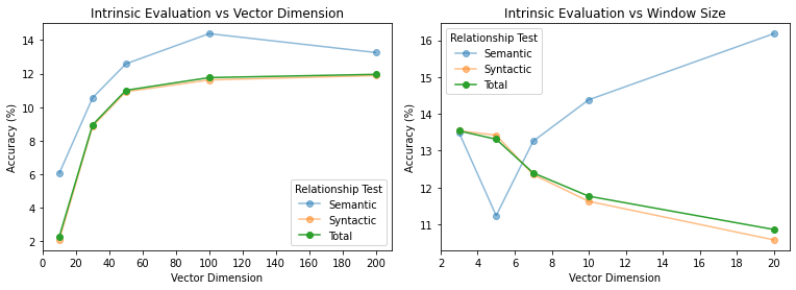

We can see for a fixed window size, the vector dimension size will lead to improvements in semantic and syntactic accuracy up to a certain size (e.g. 100 in the above) before the gains plateau. Vector dimension size determines the number of elements used to represent a word. When it is too small, it is limited in it's ability to represent the word and nuances between words are lost. By increasing the vector dimensions, the model is able to improve it's ability to represent the word and subsequently shows improved performance. However, once the vector dimension is too large, the additional dimensions do not contribute much to the meaning of the word and there are no additional gains in representation or performance.

For a fixed vector dimension, as the window size increases, the semantic accuracy improves initially but plateaus and may reduce once the window size is too large. There are no significant improvements with symantic performance with changes in window size, but performance will decline once the window size is too large and this occurs prior to the semantic accuracy decline. Window size represents the number of context words (i.e. surrounding words) used to construct the word vector. Semantic tasks challenge the word embeddings in their capturing of meaning while syntactic tasks challenge the vectors in their ability to understand syntax rules and grammar. When the window size is too small, the context words may not carry enough information to construct a good semantic representation of a word and thus by increasing the window size, we see improvements in the semantic accuracy. However, once the window size is too large, it is likely to include noise and unrelated words which do not contribute to semantic representation and actually worsen the syntactic representation.

The main learnings from this task is the importance of selecting a suitable vector dimension size and a suitable window size which enables a good balance of semantic and syntactic representation. Based on the evaluation above, the best combination appeared to be a vector size of 200 and a window size of 10. 

Intrinsic Evaluation of Word2Vec of varying vector dimension size. For the following 4 results, all have a window size of 10.  Results are in order of increasing vector dimension size from 10, 30, 50, 100 & 200
Vector size 10

capital-common-countries.txt:
ACCURACY TOP1: 1.79% (1/56)
capital-world.txt:
ACCURACY TOP1: 0.00% (0/34)
currency.txt:
ACCURACY TOP1: 0.00% (0/10)
city-in-state.txt:
ACCURACY TOP1: 0.00% (0/135)
family.txt:
ACCURACY TOP1: 12.38% (26/210)
gram1-adjective-to-adverb.txt:
ACCURACY TOP1: 0.23% (2/870)
gram2-opposite.txt:
ACCURACY TOP1: 0.17% (1/600)
gram3-comparative.txt:
ACCURACY TOP1: 1.43% (19/1332)
gram4-superlative.txt:
ACCURACY TOP1: 0.32% (3/930)
gram5-present-participle.txt:
ACCURACY TOP1: 4.95% (46/930)
gram6-nationality-adjective.txt:
ACCURACY TOP1: 0.88% (7/791)
gram7-past-tense.txt:
ACCURACY TOP1: 6.01% (89/1482)
gram8-plural.txt:
ACCURACY TOP1: 0.57% (5/870)
gram9-plural-verbs.txt:
ACCURACY TOP1: 0.67% (4/600)
Questions seen/total: 45.28% (8850/19544)
Sem

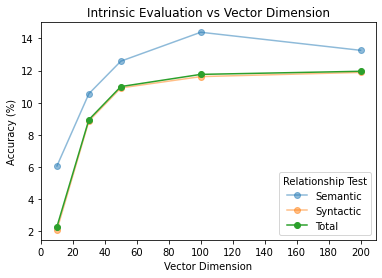

Intrinsic Evaluation of Word2Vec of varying window size. For the following, all have use a vector dimension size of 100.  Results are in order of increasing window size from 3, 5, 7, 20 & 100

Window size 3
capital-common-countries.txt:
ACCURACY TOP1: 3.57% (2/56)
capital-world.txt:
ACCURACY TOP1: 0.00% (0/34)
currency.txt:
ACCURACY TOP1: 0.00% (0/10)
city-in-state.txt:
ACCURACY TOP1: 0.74% (1/135)
family.txt:
ACCURACY TOP1: 27.14% (57/210)
gram1-adjective-to-adverb.txt:
ACCURACY TOP1: 1.84% (16/870)
gram2-opposite.txt:
ACCURACY TOP1: 3.50% (21/600)
gram3-comparative.txt:
ACCURACY TOP1: 14.49% (193/1332)
gram4-superlative.txt:
ACCURACY TOP1: 9.25% (86/930)
gram5-present-participle.txt:
ACCURACY TOP1: 36.77% (342/930)
gram6-nationality-adjective.txt:
ACCURACY TOP1: 1.26% (10/791)
gram7-past-tense.txt:
ACCURACY TOP1: 22.60% (335/1482)
gram8-plural.txt:
ACCURACY TOP1: 5.40% (47/870)
gram9-plural-verbs.txt:
ACCURACY TOP1: 14.67% (88/600)
Questions seen/total: 45.28% (8850/19544)
Semantic a

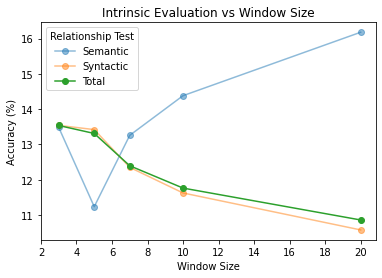

,Vector Dimension Size,Semantic Accuracy,Syntactic Accuracy,Total Accuracy
0,10,6.067416,2.093992,2.293785
1,30,10.561798,8.863772,8.949153
2,50,12.584270,10.922070,11.005650
3,100,14.382022,11.624033,11.762712
4,200,13.258427,11.885782,11.954802


,Window Size,Semantic Accuracy,Syntactic Accuracy,Total Accuracy
0,3,13.483146,13.539560,13.536723
1,5,11.235955,13.420583,13.310734
2,7,13.258427,12.349792,12.395480
3,10,14.382022,11.624033,11.762712
4,20,16.179775,10.577037,10.858757


In [ ]:
# # Importing Libraries
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from nltk.tokenize import WhitespaceTokenizer
from nltk.corpus import stopwords as sw
import pickle
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import warnings
from gensim.models import Word2Vec
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from gensim.models import KeyedVectors

def pickle_dump(obj, filename): # Save as pickle
  temp = open(filename, 'wb' )
  pickle.dump(obj, temp)
  temp.close()

def load_pickle(filename): #Load saved file
  saved_file = open(filename, 'rb')
  loaded_file = pickle.load(saved_file)
  saved_file.close()
  return loaded_file

# '''
# ----------------------------------------------
# #1. Preprocessing for word embedding training
# ----------------------------------------------
# '''
def preprocess_word_embedding():
  embedding_text = training_posts + testing_posts #Use both the training and testing posts for word embedding training.
  tokenizer = WhitespaceTokenizer()
  stopwords = sw.words()
  cleaned_text = []
  for post in embedding_text:
    post_list = post.lower() #Case folding
    post_list = post_list.split('|') # Each post is delimited by '|', so we split on this to get a post.

    for sent in post_list:
      x = tokenizer.tokenize(sent)    #WhiteSpace tokenizer. 
      x = [w for w in x if not w in stopwords]
      if len(x) >= 5:
        cleaned_text.append(x) 
  return cleaned_text

x_word_emb = preprocess_word_embedding() 
pickle_dump(x_word_emb, 'x_word_emb.pickle')
print("Preprocessing has finished.")

# '''
# ----------------------------------------------
# #2 Training models [ALL]
# This section is used to create Word2Vec CBOW models with variations in window size and vector dimension size. 
# If you would like to only view the best embedding intrinsic evaluation, please change w2v_all to False. 
# ----------------------------------------------
# '''
w2v_all = True
if w2v_all:
  window_sizes = [3, 5, 7, 10, 20]  
  vec_dim = [10, 30, 50, 100, 200]
  for size in window_sizes:
    for dim in vec_dim:
      x = Word2Vec(sentences = x_word_emb, size = dim, window = size, sg = 0, workers=4)
      fname = "CBOW_VecSize"+str(dim)+"_WS"+str(size)
      x.wv.save_word2vec_format(fname+'.txt', binary = False)
else:
  window_size = 10  
  vec_dim = 100
  print("Training Word2Vec CBOW model...")
  model = Word2Vec(sentences = x_word_emb, size = vec_dim, window = window_size, sg = 0, workers=4) #Using the GenSim Word2Vec model
  print("Word2Vec CBOW training has finished:", model)
  model.save("w2v_cbow.model")
  model.wv.save_word2vec_format('cbow_w2v.txt', binary=False)

# '''
# ----------------------------------------------
# #3 Intrinsic evaluation
# ----------------------------------------------
# '''
# # Code from the Word Analogy Evaluation ipynb
!git clone https://github.com/stanfordnlp/GloVe.git

def evaluate_vectors(W, vocab, prefix='./eval/question-data/'):
    """Evaluate the trained word vectors on a variety of tasks"""

    filenames = [
        'capital-common-countries.txt', 'capital-world.txt', 'currency.txt',
        'city-in-state.txt', 'family.txt', 'gram1-adjective-to-adverb.txt',
        'gram2-opposite.txt', 'gram3-comparative.txt', 'gram4-superlative.txt',
        'gram5-present-participle.txt', 'gram6-nationality-adjective.txt',
        'gram7-past-tense.txt', 'gram8-plural.txt', 'gram9-plural-verbs.txt',
        ]

    split_size = 100
    correct_sem = 0; # count correct semantic questions
    correct_syn = 0; # count correct syntactic questions
    correct_tot = 0 # count correct questions
    count_sem = 0; # count all semantic questions
    count_syn = 0; # count all syntactic questions
    count_tot = 0 # count all questions
    full_count = 0 # count all questions, including those with unknown words

    for i in range(len(filenames)):
        with open('%s/%s' % (prefix, filenames[i]), 'r') as f:
            full_data = [line.rstrip().split(' ') for line in f]
            full_count += len(full_data)
            data = [x for x in full_data if all(word in vocab for word in x)]

        if len(data) == 0:
            print("ERROR: no lines of vocab kept for %s !" % filenames[i])
            print("Example missing line:", full_data[0])
            continue

        indices = np.array([[vocab[word] for word in row] for row in data])
        ind1, ind2, ind3, ind4 = indices.T

        predictions = np.zeros((len(indices),))
        num_iter = int(np.ceil(len(indices) / float(split_size)))
        for j in range(num_iter):
            subset = np.arange(j*split_size, min((j + 1)*split_size, len(ind1)))

            pred_vec = (W[ind2[subset], :] - W[ind1[subset], :]
                +  W[ind3[subset], :])

            dist = np.dot(W, pred_vec.T)


            for k in range(len(subset)):
                dist[ind1[subset[k]], k] = -np.Inf
                dist[ind2[subset[k]], k] = -np.Inf
                dist[ind3[subset[k]], k] = -np.Inf

            predictions[subset] = np.argmax(dist, 0).flatten()

        
        val = (ind4 == predictions) # correct predictions
        count_tot = count_tot + len(ind1)
        correct_tot = correct_tot + sum(val)
        if i < 5:
            count_sem = count_sem + len(ind1)
            correct_sem = correct_sem + sum(val)
        else:
            count_syn = count_syn + len(ind1)
            correct_syn = correct_syn + sum(val)

        print("%s:" % filenames[i])
        print('ACCURACY TOP1: %.2f%% (%d/%d)' %
            (np.mean(val) * 100, np.sum(val), len(val)))
        
    return correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count

    
def word_embed_eval(fname):
  vectors_file = fname
  with open(vectors_file, 'r') as f:
    vectors = {}
    for line in f.readlines()[1:]: 
      vals = line.rstrip().split(' ')
      vectors[vals[0]] = [float(x) for x in vals[1:]]
  vocab_words=list(vectors.keys())
  vocab_size = len(vocab_words)
  vocab = {w: idx for idx, w in enumerate(vocab_words)}
  ivocab = {idx: w for idx, w in enumerate(vocab_words)}
  vector_dim = len(vectors[ivocab[0]])
  W = np.zeros((vocab_size, vector_dim))
  for word, v in vectors.items():
      if word == '<unk>':
          continue
      W[vocab[word], :] = v

  W_norm = np.zeros(W.shape)
  d = (np.sum(W ** 2, 1) ** (0.5))
  W_norm = (W.T / d).T
  correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count = evaluate_vectors(W_norm, vocab, prefix='/content/GloVe/eval/question-data')
  sem_acc = 100 * correct_sem / float(count_sem)
  syn_acc = 100 * correct_syn / float(count_syn)
  total_acc = 100 * correct_tot / float(count_tot)
  print('Questions seen/total: %.2f%% (%d/%d)' %
      (100 * count_tot / float(full_count), count_tot, full_count))
  print('Semantic accuracy: %.2f%%  (%i/%i)' %
      (100 * correct_sem / float(count_sem), correct_sem, count_sem))
  print('Syntactic accuracy: %.2f%%  (%i/%i)' %
      (100 * correct_syn / float(count_syn), correct_syn, count_syn))
  print('Total accuracy: %.2f%%  (%i/%i)' % (100 * correct_tot / float(count_tot), correct_tot, count_tot))
  return [sem_acc, syn_acc, total_acc]

print("Intrinsic word vector evaluation\n")

# '''
# ----------------------------------------------
# 4.2 Graph 1: Varying vector dimension size.
# ----------------------------------------------
# '''
if w2v_all:

  dims = [10, 30, 50, 100, 200]

  print("Intrinsic Evaluation of Word2Vec of varying vector dimension size. For the following 4 results, all have a window size of 10.\
  Results are in order of increasing vector dimension size from 10, 30, 50, 100 & 200")

  ws10_files = ['CBOW_VecSize10_WS10.txt', 'CBOW_VecSize30_WS10.txt',
          'CBOW_VecSize50_WS10.txt', 'CBOW_VecSize100_WS10.txt',
          'CBOW_VecSize200_WS10.txt']
  sem_acc_1 = []
  syn_acc_1 = []
  tot_acc_1 = []
  for i in range(len(ws10_files)):
    print()
    print("Vector size {}".format(dims[i]))
    results = word_embed_eval(ws10_files[i])
    sem_acc_1.append(results[0])
    syn_acc_1.append(results[1])
    tot_acc_1.append(results[2])

  sem_acc_line = [dims, sem_acc_1]
  syn_acc_line = [dims, syn_acc_1]
  tot_acc_line = [dims, tot_acc_1]

  table1_dict = {'Vector Dimension Size': dims, 'Semantic Accuracy': sem_acc_1, 'Syntactic Accuracy': syn_acc_1,
                'Total Accuracy': tot_acc_1} 
      
  table1_df = pd.DataFrame(table1_dict)


  plt.plot(sem_acc_line[0], sem_acc_line[1], label = "Semantic", marker = 'o', alpha = 0.5)
  plt.plot(syn_acc_line[0], syn_acc_line[1], label = "Syntactic", marker = 'o', alpha = 0.5)
  plt.plot(tot_acc_line[0], tot_acc_line[1], label = "Total", marker = 'o')
  plt.xticks(range(0,210,20))
  plt.title('Intrinsic Evaluation vs Vector Dimension')
  plt.ylabel("Accuracy (%)")
  plt.xlabel("Vector Dimension")
  plt.legend(title = 'Relationship Test')
  plt.show()

  # '''
  # ----------------------------------------------
  # 4.3 Graph 2: Varying window size
  # ----------------------------------------------
  # '''

  ws = [3, 5, 7, 10, 20]

  print("Intrinsic Evaluation of Word2Vec of varying window size. For the following, all have use a vector dimension size of 100.\
  Results are in order of increasing window size from 3, 5, 7, 20 & 100")

  v100_files = ['CBOW_VecSize100_WS3.txt', 'CBOW_VecSize100_WS5.txt',
                'CBOW_VecSize100_WS7.txt', 'CBOW_VecSize100_WS10.txt',
                'CBOW_VecSize100_WS20.txt']
  sem_acc_2 = []
  syn_acc_2 = []
  tot_acc_2 = []

  for i in range(len(v100_files)):
    print()
    print('Window size {}'.format(ws[i]))
    results = word_embed_eval(v100_files[i])
    sem_acc_2.append(results[0])
    syn_acc_2.append(results[1])
    tot_acc_2.append(results[2])  


  sem_acc_line2 = [ws, sem_acc_2]
  syn_acc_line2 = [ws, syn_acc_2]
  tot_acc_line2 = [ws, tot_acc_2]

  plt.plot(sem_acc_line2[0], sem_acc_line2[1], label = "Semantic", marker = 'o', alpha = 0.5)
  plt.plot(syn_acc_line2[0], syn_acc_line2[1], label = "Syntactic", marker = 'o', alpha = 0.5)
  plt.plot(tot_acc_line2[0], tot_acc_line2[1], label = "Total", marker = 'o')
  plt.xticks(range(2,21,2))
  plt.title('Intrinsic Evaluation vs Window Size')
  plt.ylabel("Accuracy (%)")
  plt.xlabel("Window Size")
  plt.legend(title = 'Relationship Test')
  plt.show()

  table2_dict = {'Window Size': ws, 'Semantic Accuracy': sem_acc_2, 'Syntactic Accuracy': syn_acc_2,
                'Total Accuracy': tot_acc_2} 
  from IPython.display import display
      
  table2_df = pd.DataFrame(table2_dict)


  display(table1_df)    
  print()
  display(table2_df)
else:
  word_embed_eval('cbow_w2v.txt')

## 4.2. Performance Evaluation with Data Processing Techiques


You are required to evaluate with the testing dataset and provide the table with f1 of test set.
Note that it will not be marked if you do not display it in the ipynb file.




---


In this section, the effects of different data pre-processing techniques on the classification performance on a bi-directional LSTM is evaluated. 
For all evaluations, post delimiter character '|||' were removed prior to preprocessing. Tokenization was applied with the GenSim 'WhitespaceTokenizer'. The whitespace tokenizer was chosen as it would capture emoticons as tokens. The pre-processing techniques evaluated are:
* Baseline: Case-folding
* Case-folding and remove numbers (A1)
* Case-folding, remove numbers and URL (B1)
* Case-folding, remove numbers and punctuation (A2)
* Case-folding, remove numbers, punctuation and URLs (B2)
* Case-folding, remove numbers, punctuation and stopwords (A3)
* Case-folding, remove numbers, punctuation, URLs and stopwords (B3)
* Case-folding, remove numbers, punctuation, stopwords and stemming (A4)
* Case-folding, remove numbers, punctuation, stopwords, URLs and stemming (B4)

Each preprocessing technique was evaluated on a bi-directional LSTM with the following parameters:
* Number of hidden layers = 100 
* Learning rate = 0.001
* Optimizer = Adam
* Batch size = 16
* Number of epochs = 10
There was significant variation in the length of each instance of the training and the max length for the set was chosen as the padding sequence length. The weighted f1-score for each technique is summarised in the table below. 

\begin{array}{|c||c|} \hline
\text{Preprocessing Method} & \text{F1 Score (%)} \\ \hline
\text{Baseline} & 83.12 \\ 
\text{A1} & 81.92 \\ 
\text{B1} & 83.23 \\ 
\text{A2} & 84.07 \\ 
\text{B2} & 84.99 \\ 
\text{A3} & 84.98 \\ 
\text{B3} & 84.07 \\ 
\text{A4} & 86.26 \\ 
\text{B4} & 83.41 \\ 
\hline
\end{array}


The findings of this section indicate that there should be careful consideration of the combination of preprocessing due to the complexity of language. There were only marginal improvements with additional pre-processing techniques when added to case-folding. This may suggest that punctuation, stopwords, numbers and URL may not be important for this task. It is important to also consider that the dataset is from an online from. Users on the forum may be less likely to use stopwords and use informal language which may explain the minimal change in performance with the removal of stopwords and stemming. 

In general, it appeared that whenever URLs are removed, i.e. the B methods compared to baseline, there was an improvement in the F1 scorebut these improvements are unlikely to be statistically significant. This is possibly due to the fact that the words in the URL domain may be irrelevant to the person's 'Thinking-Feeling' label.

When URLs are retained, as additional preprocessing methods are added on, i.e. from A1, A2, A3 to A4, there are improvements in performance. Overall, the best method over the baseline was the combination of case-folding, removing numbers, punctuation, stopwords and stemming. This combination lead to a faster training time and a 3.14% gain in F1. This will be used as the best pre-processing technique for other sections in this report. 

In [ ]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import numpy as np
import warnings
from gensim.models import Word2Vec
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from nltk.tokenize import TweetTokenizer, WhitespaceTokenizer
import gensim.downloader as api
import pickle 
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords as sw
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from google.colab import drive
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import classification_report
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import time

'''
PyDrive code
'''
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


'''
Section 1: Helper functions
'''
def pickle_dump(obj, filename):
  # drive.mount('/content/drive')
  # temp = open('/content/drive/My Drive/COMP5046/'+filename, 'wb' )
  temp = open(filename, 'wb' )
  pickle.dump(obj, temp)
  temp.close()

def load_pickle(filename):
  # saved_file = open('/content/drive/My Drive/COMP5046/'+filename, 'rb')
  saved_file = open(filename, 'rb')
  loaded_file = pickle.load(saved_file)
  saved_file.close()
  return loaded_file

def preprocess_URL(text):
  URLS = r'http[s]?:\/{1,3}(?:[\w]|[\d]|[$-_@.&+]|[!*\(\),]|(?:%[\d\w][\d\w]))+'
  for i in range(len(text)):
    text[i] = re.sub(URLS, ' ', text[i])  

def make_vocab_list(vocab):
  word_set = set()
  for text in vocab:
    for token in text:
      word_set.add(token)  
  word_set.add('[PAD]')
  word_set.add('[UNKNOWN]')
  word_list = list(word_set)
  word_list.sort()
  return word_list
def make_index_dict(vocab_list):
  word_index = {}
  ind = 0
  for word in vocab_list:
      word_index[word] = ind
      ind += 1
  return word_index
'''
All the preprocessed texts have been saved as pickle files. Please change to False,
if you would like to run the preprocessing functions. To have all preprocessed text, 
this will take at least 1 hour to load. 
'''
load_all_preprocessed_text = True

tokenizer = WhitespaceTokenizer()
stopwords = sw.words()
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(training_labels)
y_test_encoded = label_encoder.fit_transform(testing_labels)

'''
Section 2: Set-up for model training and test evaluation

'''
# Parameters for Word Embedding Lookup Table
def preprocess_word_embedding():
  embedding_text = training_posts + testing_posts #Use both the training and testing posts for word embedding training.
  cleaned_text = []
  for post in embedding_text:
    post_list = post.lower() #Case folding
    post_list = post_list.split('|') # Each post is delimited by '|', so we split on this to get a post.

    for sent in post_list:
      x = tokenizer.tokenize(sent)    #WhiteSpace tokenizer. 
      x = [w for w in x if not w in stopwords]
      if len(x) >= 5:
        cleaned_text.append(x) 
  return cleaned_text

if load_all_preprocessed_text:
  id = '1-9uhjjbXpqPRmXMgDQkTcNX8LEHMoekV'
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile('x_word_emb.pickle')  
  x_word_emb =load_pickle('x_word_emb.pickle')
else:
  x_word_emb = preprocess_word_embedding() 
  pickle_dump(x_word_emb, 'x_word_emb.pickle')


tokenizer = WhitespaceTokenizer()
window_size = 10  
vec_dim = 100

if load_all_preprocessed_text:
  id = '1-L_9R2h66uIwZFKIOnrbkUX8CyLAbQl6'
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile('emb1.wordvectors')
  emb_model_1 = KeyedVectors.load("emb1.wordvectors", mmap='r') # Load the trained word embedding (Word2Vec CBOW, window size = 10, vec_dim = 100) as per 4.1
else:  
  emb_model_1 = Word2Vec(sentences = x_word_emb, size = vec_dim, window = window_size, sg = 0, workers=4) #Training a Word2Vec using the params found from 4.1
  word_vectors_1 = emb_model_1.wv
  word_vectors_1.save("emb1.wordvectors")
  
emb_model_2 = api.load('glove-twitter-50') #Load the pre-trained word embedding model.
total_emb_dim = emb_model_1.vector_size + emb_model_2.vector_size
def embedding_lookup(emb_1, emb_2, emb_dim, word_list): 
  emb_table = []
  for i, word in enumerate(word_list):  
    if word in emb_1 and word in emb_2:
        emb_table.append(np.concatenate((emb_1[word],emb_2[word]),0))    
    elif word in emb_1 and not word in emb_2:
        emb_table.append(np.concatenate((emb_1[word],[0]*emb_2.vector_size),0))
    elif word in emb_2 and not word in emb_1:
      emb_table.append(np.concatenate((emb_2[word],[0]*emb_1.vector_size),0))
    else:
        emb_table.append([0]*emb_dim)  
  return np.array(emb_table)  

# Helper function for encoding and padding of data
def encode_pad(input, seq_length, word_index): 
  encoded = []
  for sent in input:
    temp_encoded = [word_index[word] if word in word_index else word_index['[UNKNOWN]'] for word in sent]
    if len(temp_encoded) > seq_length:
      temp_encoded = temp_encoded[:seq_length]
    if len(temp_encoded) < seq_length:
      temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))
    encoded.append(temp_encoded)  
  return encoded

#Model class
n_class = 2
n_hidden = 100
learning_rate = 0.001
epochs = 10
display_interval = 1  
batch_size = 16
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class Bi_LSTM_Emb(nn.Module):
    def __init__(self, vocab_size, embedding_table):
        super(Bi_LSTM_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, total_emb_dim)
        self.emb.weight.data.copy_(torch.from_numpy(embedding_table))
        self.emb.weight.requires_grad = False

        self.lstm = nn.LSTM(total_emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)

    def forward(self, x):
        x = self.emb(x)                
        lstm_out, (h_n, c_n) = self.lstm(x)
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z

'''
Section 3: Preprocessing functions and their output.
'''
# Baseline (tokenisation only). This will serve as a reference point for methods.
def preprocess_0(text):
  cleaned = []
  for post in text:
    post = re.sub(r"\|\|\|", " ", post.lower()) #Remove delimiter and case-folding
    post = tokenizer.tokenize(post) 
    cleaned.append(post)
  print("Preprocessing 0 completed.")
  return cleaned
if load_all_preprocessed_text :
  id = '1ZABh5rr9Ou7VV7oDa27AIItfAVKPuIK-'
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile('training_A0.pickle')  

  id = '1-0EOfZ9k85hlCbSirASJQWVRBYnNxaht'
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile('testing_A0.pickle')  

  training_A0 = load_pickle('training_A0.pickle')
  testing_A0 = load_pickle('testing_A0.pickle')
else:
  training_A0 = preprocess_0(text = training_posts)
  pickle_dump(training_A0, 'training_A0.pickle')
  testing_A0 = preprocess_0( text = testing_posts)
  pickle_dump(testing_A0, 'testing_A0.pickle')

def preprocess_1(text):
  cleaned = []
  for post in text:
    post = re.sub(r"\|\|\|", " ", post.lower()) #Remove delimiter and case-folding
    post= re.sub(r'[0-9]','', post) #Remove numbers        
    post = tokenizer.tokenize(post) 
    cleaned.append(post)
  print("Preprocessing 1 completed.")
  return cleaned

if load_all_preprocessed_text :
  id = '1aDPnMyvFebTqgrQAkgqaRDNl9a-hmfPL'
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile('training_A1.pickle')  
  
  id = '1-28L_JAlQPp5jWebNBoDoC0ImUMjAVOt'
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile('testing_A1.pickle')  

  training_A1 = load_pickle('training_A1.pickle')
  testing_A1 = load_pickle('testing_A1.pickle')
else:
  training_A1 = preprocess_1(text = training_posts)
  pickle_dump(training_A1, 'training_A1.pickle')
  testing_A1 = preprocess_1(text = testing_posts)
  pickle_dump(testing_A1, 'testing_A1.pickle')  

'''
B1. Remove URLS, numbers, case-folding and remove delimiters.
'''
def preprocess_URL(text):
  temp_list = []
  URLS = r'http[s]?:\/{1,3}(?:[\w]|[\d]|[$-_@.&+]|[!*\(\),]|(?:%[\d\w][\d\w]))+'
  for post in text:
    post = re.sub(URLS, ' ', post)
    temp_list.append(post)
  return temp_list


if load_all_preprocessed_text:
  id = '1gbzXQsCmIoHqH1Nh8R7TOVv5ziIdoqWQ'
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile('training_posts_B.pickle')  

  id = '1-5OhlJFt0FGRI4bFxvX1Oxnk8OUQAuLo'
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile('testing_posts_B.pickle')  
  
  training_posts_B = load_pickle('training_posts_B.pickle')
  testing_posts_B = load_pickle('testing_posts_B.pickle')
else:
  training_posts_B = preprocess_URL(training_posts)
  testing_posts_B = preprocess_URL(testing_posts)


if load_all_preprocessed_text:
  id = '1FMOJfOHOi6VS43zuAw_XypkxaIXm8CFq'
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile('training_B1.pickle')  

  id = '1-6ejZxrPXFaPhfNxhKer-fhjhLcZTCmj'
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile('testing_B1.pickle')   

  training_B1 = load_pickle('training_B1.pickle')
  testing_B1 = load_pickle('testing_B1.pickle')
else:
  training_B1 = preprocess_1(text = training_posts_B)
  pickle_dump(training_B1, 'training_B1.pickle')
  testing_B1 = preprocess_1(text = testing_posts_B)
  pickle_dump(testing_B1, 'testing_B1.pickle')

'''
A2. A1 + Remove punctuation 
'''
def preprocess_2(text):
  cleaned = []
  for post in text:
    post = re.sub(r"\|\|\|", " ", post.lower()) #Remove delimiter and case-folding
    post= re.sub(r'[0-9]','', post) #Remove numbers
    post = re.sub(r'[!"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~]',' ',post) # Remove punctuation
    post = tokenizer.tokenize(post) 
    cleaned.append(post)
  return cleaned

if load_all_preprocessed_text:
  id = '1-4g0b0Uwm87r6sq8hp1YN1NjueNK9e2H'
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile('training_A2.pickle')  

  id = '1-BgN13hd2FBZ3Z9Xgzfj5PkDDRznQJor'
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile('testing_A2.pickle')  

  training_A2 = load_pickle('training_A2.pickle')
  testing_A2 = load_pickle('testing_A2.pickle')
else:
  training_A2 = preprocess_2(text = training_posts)
  pickle_dump(training_A2, 'training_A2.pickle')
  testing_A2 = preprocess_2(text = testing_posts)
  pickle_dump(testing_A2, 'testing_A2.pickle')
'''
B2. B1 + remove punctuation 
'''

if load_all_preprocessed_text:
  id = '1-EKqCxAJJXutRvWjxINzY7X-t2aAXBwr'
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile('training_B2.pickle')  

  id = '1-IDL5sh-lK8dul1zcbyeP3a5e9U_rhln'
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile('testing_B2.pickle')  

  training_B2 = load_pickle('training_B2.pickle')
  testing_B2 = load_pickle('testing_B2.pickle')
else:
  training_B2 = preprocess_2(text = training_posts_B)
  pickle_dump(training_B2, 'training_B2.pickle')
  testing_B2 = preprocess_2(text = testing_posts_B)
  pickle_dump(testing_B2, 'testing_B2.pickle')
'''
A3. A2 + Stopword removal
'''
def preprocess_3(text):
  cleaned = []
  for post in text:
    post = re.sub(r"\|\|\|", " ", post.lower()) #Remove delimiter and case-folding
    post= re.sub(r'[0-9]','', post) #Remove numbers
    post = re.sub(r'[!"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~]',' ',post) # Remove punctuation
    post = tokenizer.tokenize(post) 
    post = [w for w in post if not w in stopwords]
    cleaned.append(post)
  return cleaned

if load_all_preprocessed_text:
  id = '1-BqJvEQf9cEtLxrAKYjnRhid7JDyL34d'
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile('training_A3.pickle')  

  id = '1-E4brzem5gv_Ws45_L9s9S-dwHSwRJ5x'
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile('testing_A3.pickle')  

  training_A3 = load_pickle('training_A3.pickle')
  testing_A3 = load_pickle('testing_A3.pickle')
else:
  training_A3 = preprocess_3(text = training_posts)
  pickle_dump(training_A3, 'training_A3.pickle')
  testing_A3 = preprocess_3(text = testing_posts)
  pickle_dump(testing_A3, 'testing_A3.pickle')

'''
B3. B3 + Stopword removal 
'''

if load_all_preprocessed_text:
  id = '1p6VELme1b4MBEufQ8rP5_zyWNO4G6tP_'
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile('training_B3.pickle')  

  id = '1-2FZilsmc5xRdksS6lrayNbkDLHAK2lo'
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile('testing_B3.pickle')  

  training_B3 = load_pickle('training_B3.pickle')
  testing_B3 = load_pickle('testing_B3.pickle')
else:
  training_B3 = preprocess_3(text = training_posts_B)
  pickle_dump(training_B3, 'training_B3.pickle')
  testing_B3 = preprocess_3(text = testing_posts_B)
  pickle_dump(testing_B3, 'testing_B3.pickle')

'''
A4. A3 + Stemming
'''
def preprocess_4(text):
  cleaned = []
  stemmer = PorterStemmer()
  for post in text:
    post = re.sub(r"\|\|\|", " ", post.lower()) #Remove delimiter and case-folding
    post= re.sub(r'[0-9]','', post) #Remove numbers
    post = re.sub(r'[!"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~]',' ',post) # Remove punctuation
    post = tokenizer.tokenize(post) 
    post = [w for w in post if not w in stopwords]
    post = [stemmer.stem(w) for w in post]
    cleaned.append(post)
  return cleaned

if load_all_preprocessed_text:
  id = '1-H5zmJ3mHqGromgBUMb2jf1stHE0yQ6I'
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile('training_A4.pickle')  

  id = '1-OgyjUXyCVyoVWNT4IVsS8KNXbGwPkS-'
  downloaded = drive.CreateFile({'id':id})  
  downloaded.GetContentFile('testing_A4.pickle')  
  
  training_A4 = load_pickle('training_A4.pickle')
  testing_A4 = load_pickle('testing_A4.pickle')
else:
  training_A4 = preprocess_4(text = training_posts)
  pickle_dump(training_A4, 'training_A4.pickle')
  testing_A4 = preprocess_4(text = testing_posts)
  pickle_dump(testing_A4, 'testing_A4.pickle')

'''
B4. B3 + Stemming
'''

if load_all_preprocessed_text:
  id = '1-YURSjB0HypB-HuqYFiXHCwzeRldukQD'
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile('training_B4.pickle')  

  id = '1-ZkaSKaq3cxrYJ0mqBSQ3rFVsM37gqGb'
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile('testing_B4.pickle') 
    
  training_B4 = load_pickle('training_B4.pickle')
  testing_B4 = load_pickle('testing_B4.pickle')
else:
  training_B4 = preprocess_4(text = training_posts_B)
  pickle_dump(training_B4, 'training_B4.pickle')
  testing_B4 = preprocess_4(text = testing_posts_B)
  pickle_dump(testing_B4, 'testing_B4.pickle')



'''
Section 4: Evaluation 
'''

f1_list = []
for training, testing, text in [(training_A0, testing_A0, 'Baseline (Tokenisation Only)'),
                          (training_A1, testing_A1, 'Remove numbers'),
                          (training_B1, testing_B1, 'Remove numbers and URLs'), 
                          (training_A2, testing_A2, 'Remove numbers and punctuation'),
                          (training_B2, testing_B2, 'Remove numbers, punctuation and URLs'),
                          (training_A3, testing_A3, 'Remove numbers, punctuation and stopwords'),
                          (training_B3, testing_B3, 'Remove numbers, punctuation, stopwords and URL'),
                          (training_A4, testing_A4, 'Remove numbers, punctuation, stopwords and stemming'),
                          (training_B4, testing_B4, 'Remove numbers, punctuation, stopwords, URL and stemming')]:
  
  print(f"Preparing to evaluate {text}")
  print('-'*30)
  # Create the word list  
  vocab_list = make_vocab_list(training)
  # Create the word index dictionary
  word_index = make_index_dict(vocab_list)
  # Create the word embedding lookup table
  embedding = embedding_lookup(emb_model_1, emb_model_2, total_emb_dim, vocab_list)
  print(len(embedding))
  # Encoding and padding of training and test data
  train_len_list = [len(s) for s in training]
  seq_length = max(train_len_list)
  train_encoded = encode_pad(training, seq_length, word_index)
  test_encoded = encode_pad(testing, seq_length, word_index)
  #Model parameters
  vocab_size = len(vocab_list)
  model = Bi_LSTM_Emb(vocab_size, embedding).to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)
  input_torch = torch.from_numpy(np.array(train_encoded)).to(device)
  target_torch = torch.from_numpy(np.array(y_train_encoded)).view(-1).to(device)
  train_data = TensorDataset(input_torch, target_torch)
  train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)
  for epoch in range(epochs):
    train_running_loss = 0.0
    
    target_count = 0
    train_correct = 0 
    start_time = time.time()
    for sentence, target in train_loader:
      sentence = sentence.to(device)
      target = target.to(device)
      temp_batch_size = sentence.shape[0]
      model.train()
      optimizer.zero_grad()
      outputs = model(sentence)
      loss = criterion(outputs, target)  
      loss.backward()
      optimizer.step()
      train_running_loss += loss.item()
      preds = torch.argmax(outputs.data, -1)
      end_time = time.time()
      elapsed_time = end_time - start_time
      target_count += sentence.size(0)
      train_correct += (preds.cpu().numpy() == target.cpu().numpy()).sum().item()    
      acc_now = train_correct/target_count * 100
      loss_now = train_running_loss / target_count

    if epoch%display_interval == display_interval-1:
      print(f"Epoch {epoch+1} of {epochs} | Time = {elapsed_time :.2f}s")
      print(f"Train Loss: {loss_now:.4f}, Train Acc: {acc_now:.2f}%")
 
  # Preparing for test set evaluation
    #Convert the test data to a dataloader
  test_torch = torch.from_numpy(np.array(test_encoded)) 
  test_data = TensorDataset(test_torch, torch.from_numpy(np.array(y_test_encoded)))
  test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle =False)
    #Create variables to store the test evaluation results
  temp_predictions = []
  test_correct = 0 
  total = 0 
  model.eval()
  with torch.no_grad():
    for sentence, target in test_loader:
      sentence = sentence.to(device)
      target = target.to(device)
      outputs = model(sentence)
      predicted = torch.argmax(outputs.data, -1)
      temp_predictions.append(predicted.cpu().numpy())
      total += target.size(0) #The total of the target size should equal the len(testing_posts)
      test_correct += (predicted.cpu().numpy() == target.cpu().numpy()).sum().item()  #Keep track of every correct prediction from each batch.
  test_predictions = [] #Unfolding the list to get all the predictions for sklearn functions
  for batch in temp_predictions:
    for pred in batch:
      test_predictions.append(pred)
  print('-'*30)      
  print('\n' + classification_report(y_test_encoded, test_predictions, digits = 4) +'\n' )
  f1 = f1_score(y_test_encoded, test_predictions, average= 'weighted')* 100
  f1_list.append(f1)
results_dict = {'Method': ('Baseline (Tokenisation Only)', 'Remove numbers', 'Remove numbers and URLs', 
                'Remove numbers and punctuation', 'Remove numbers, punctuation and URLs',
                'Remove numbers, punctuation and stopwords', 'Remove numbers, punctuation, stopwords and URL',
                'Remove numbers, punctuation, stopwords and stemming', 'Remove numbers, punctuation, stopwords, URL and stemming'), 
                'F1 (%)': f1_list}
from IPython.display import display
results_df = pd.DataFrame(results_dict)
display(results_df)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Preprocessing 0 completed.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Preprocessing 0 completed.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Preprocessing 1 completed.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Preprocessing 1 completed.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Preprocessing 1 completed.
Driv

,Method,F1 (%)
0,Baseline (Tokenisation Only),0.831151
1,Remove numbers,0.819169
2,Remove numbers and URLs,0.832291
3,Remove numbers and punctuation,0.840695
4,"Remove numbers, punctuation and URLs",0.849867
5,"Remove numbers, punctuation and stopwords",0.849750
6,"Remove numbers, punctuation, stopwords and URL",0.840702
7,"Remove numbers, punctuation, stopwords and ste...",0.862619
8,"Remove numbers, punctuation, stopwords, URL an...",0.834142


## 4.3. Performance Evaluation with Different Input


You are required to evaluate with the testing dataset and provide the table with f1 of test set.
Note that it will not be marked if you do not display it in the ipynb file.


In this section, the effects of different inputs in the form of word embedding combinations on f1-score performance will be evaluated. The preprocessing method for training and test input is removal of URL, removal of numbers and case-folding. As per Section 4.2, the same bi-directional LSTM with the following parameters was used for all evaluations in this section:
* Number of hidden layers = 100 
* Learning rate = 0.001
* Optimizer = Adam
* Batch size = 16
* Number of epochs = 10

The input combinations evaluated and their results are summarised in the table below:

\begin{array}{|c||c|} \hline
\text{Inputs} & \text{F1 Score (%)} \\ \hline
\text{Word2Vec CBOW + Glove Twitter 100} & 86.12 \\ 
\text{Word2Vec CBOW + Glove Wiki 100} & 84.65 \\ 
\text{Word2Vec Skip-gram + Glove Twitter 100} & 83.98 \\ 
\text{Word2Vec Skip-gram + Glove Wiki 100} & 83.29 \\ 
\hline
\end{array}

The word embedding models concatenated with the Glove Twitter 100 models generally performed better. The word vectors from the Glove Twitter 100 may be more suitable for this classification task. Both twitter and the online forum share similarities in that they are both likely to have short sentences and feature informal language/slang. On the other hand, the Wikipedia dataset the Glove model was trained on is more likely to feature formal and technical terms which may not add on much more information to our classification task.

The CBOW architecture also appeared to out-perform the Skip-Gram architecture for this extrinsic evaluation task. Mikolov et al. suggested in their original paper that Skip-Gram performs better for smaller datasets and can create better word vector representation for low frequency words. One explanation for the findings here could be that following pre-processing and cleaning, the text from user posts the frequency distribution of words may not be sparse enough for Skip-Gram to demonstrate better performance. Alternatively, it should also be noted that the same window-size and vector dimension size was used for both the Skip-Gram and CBOW. These parameters were chosen from the findings of section 4.1 which only used CBOW. As CBOW and Skip-Gram have different training objectives (predicting centre word based on context vs. predicting context based on centre word), it is possible with hyperparameters that Skip-Gram could outperform CBOW.

**Reference**

Mikolov, Tomas, et al. "Efficient estimation of word representations in vector space." arXiv preprint arXiv:1301.3781 (2013).

In [ ]:
import re
import nltk
import numpy as np
import warnings
from gensim.models import Word2Vec
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from nltk.tokenize import TweetTokenizer, WhitespaceTokenizer
import gensim.downloader as api
import pickle 

from sklearn.preprocessing import LabelEncoder
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from google.colab import drive
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import classification_report
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import time

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#Model class
n_class = 2
n_hidden = 100
learning_rate = 0.001
epochs = 10
display_interval = 1  
batch_size = 16
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class Bi_LSTM_Emb(nn.Module):
    def __init__(self, vocab_size, embedding_table):
        super(Bi_LSTM_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, total_emb_dim)
        self.emb.weight.data.copy_(torch.from_numpy(embedding_table))
        self.emb.weight.requires_grad = False

        self.lstm = nn.LSTM(total_emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)

    def forward(self, x):
        x = self.emb(x)                
        lstm_out, (h_n, c_n) = self.lstm(x)
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z


#Load the best pre-processed training and test data: Remove numbers, punctuation, stopwords and stemming 
def load_pickle(filename):
  saved_file = open(filename, 'rb')
  loaded_file = pickle.load(saved_file)
  saved_file.close()
  return loaded_file

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

training_A4_id = '1-H5zmJ3mHqGromgBUMb2jf1stHE0yQ6I'
testing_A4_id = '1-OgyjUXyCVyoVWNT4IVsS8KNXbGwPkS-'
for id,name in ((training_A4_id,'training_A4.pickle'), (testing_A4_id, 'testing_A4.pickle')):
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile(name)

training = load_pickle('training_A4.pickle')
testing = load_pickle('testing_A4.pickle')
'''
Load all the embedding models for the model evaluation
'''
load_embeddings = True #Change to False to train from scratch instead of loading saved file.
# Embeddings with A in the variable name indicate they are the ones trained from the test and training data.
if load_embeddings:
  embedding_A1_id = '1-L_9R2h66uIwZFKIOnrbkUX8CyLAbQl6' #Word2Vec CBOW, window size of 10 and vector dimension of 100
  embedding_A2_id = '1-ip1vmutYYHnprCOy3pL-pWpboKgd7H3' #FastText CBOW, window size of 10 and vector dimension of 100
  embedding_A2_ngram_id = '1-ohOwVKRH-Sxa46h4bugGklM60JvVpxu'
  for id,name in ((embedding_A1_id,'emb1.wordvectors'), (embedding_A2_id, 'emb2.wordvectors'),
                  (embedding_A2_ngram_id, 'emb2.wordvectors.vectors_ngrams.npy')):
    downloaded = drive.CreateFile({'id':id}) 
    downloaded.GetContentFile(name)
  emb_model_A1 = KeyedVectors.load("emb1.wordvectors", mmap='r')
  emb_model_A2 = KeyedVectors.load("emb2.wordvectors", mmap='r')
else:
  load_preprocessed_text_id = '1-9uhjjbXpqPRmXMgDQkTcNX8LEHMoekV' #Preprocessing as per Section 4.1
  downloaded = drive.CreateFile({'id':load_preprocessed_text_id})
  downloaded.GetContentFile('x_word_emb.pickle')
  x_word_emb = load_pickle('x_word_emb.pickle')
  window_size = 10  
  vec_dim = 100
  emb_model_A1 = Word2Vec(sentences = x_word_emb, size = vec_dim, window = window_size, sg = 0, workers=4) #Training a Word2Vec CBOW
  emb_model_A1.wv.save('emb1.wordvectors')
  emb_model_A2 = Word2Vec(sentences = x_word_emb, size = vec_dim, window = window_size, sg = 1, workers=4) #Training a Word2Vec Skip-Gram
  emb_model_A2.wv.save('emb2.wordvectors')
   

# Load the pre-trained word embedding models
emb_model_B1 = api.load("glove-twitter-100") 
emb_model_B2 = api.load('glove-wiki-gigaword-100')

combo1 = 'Word2Vec CBOW + Glove Twitter 100'
combo2 = 'Word2Vec CBOW + Glove Wiki Gigaword 100'
combo3 = 'Word2Vec SGRAM + Glove Twitter 100'
combo4 = 'Word2Vec SGRAM + Glove Wiki Gigaword 100'

section_4_3_list = []
for emb1, emb2, text in [(emb_model_A1, emb_model_B1, combo1),
                          (emb_model_A1, emb_model_B2, combo2),
                          (emb_model_A2, emb_model_B1, combo3), 
                          (emb_model_A2, emb_model_B2, combo4)]: 
  
  print(f"Preparing to evaluate {text}")
  print('-'*30)
  # Create the word list  
  vocab_list = make_vocab_list(training)
  # Create the word index dictionary
  word_index = make_index_dict(vocab_list)
  # Create the word embedding lookup table
  total_emb_dim = emb1.vector_size + emb2.vector_size
  embedding = embedding_lookup(emb1, emb2, total_emb_dim, vocab_list)
  
  # Encoding and padding of training and test data
  train_len_list = [len(s) for s in training]
  seq_length = max(train_len_list)
  train_encoded = encode_pad(training, seq_length, word_index)
  test_encoded = encode_pad(testing, seq_length, word_index)
  #Model parameters
  vocab_size = len(vocab_list)
  model = Bi_LSTM_Emb(vocab_size, embedding).to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)
  input_torch = torch.from_numpy(np.array(train_encoded)).to(device)
  target_torch = torch.from_numpy(np.array(y_train_encoded)).view(-1).to(device)
  train_data = TensorDataset(input_torch, target_torch)
  train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)

  for epoch in range(epochs):
    train_running_loss = 0.0
    
    target_count = 0
    train_correct = 0 
    start_time = time.time()
    for sentence, target in train_loader:
      sentence = sentence.to(device)
      target = target.to(device)
      temp_batch_size = sentence.shape[0]
      model.train()
      optimizer.zero_grad()
      outputs = model(sentence)
      loss = criterion(outputs, target)  
      loss.backward()
      optimizer.step()
      train_running_loss += loss.item()
      preds = torch.argmax(outputs.data, -1)
      end_time = time.time()
      elapsed_time = end_time - start_time
      target_count += sentence.size(0)
      train_correct += (preds.cpu().numpy() == target.cpu().numpy()).sum().item()    
      acc_now = train_correct/target_count * 100
      loss_now = train_running_loss / target_count

    if epoch%display_interval == display_interval-1:
      print(f"Epoch {epoch+1} of {epochs} | Time = {elapsed_time :.2f}s")
      print(f"Train Loss: {loss_now:.4f}, Train Acc: {acc_now:.2f}%")
      
  test_torch = torch.from_numpy(np.array(test_encoded))
  test_data = TensorDataset(test_torch, torch.from_numpy(np.array(y_test_encoded)))
  test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle =False)
  temp_predictions = []
  test_correct = 0 
  total = 0 
  model.eval()
  with torch.no_grad():
    for sentence, target in test_loader:
      sentence = sentence.to(device)
      target = target.to(device)
      outputs = model(sentence)
      predicted = torch.argmax(outputs.data, -1)
      temp_predictions.append(predicted.cpu().numpy())
      total += target.size(0)
      test_correct += (predicted.cpu().numpy() == target.cpu().numpy()).sum().item()  
  test_predictions = []
  for batch in temp_predictions:
    for pred in batch:
      test_predictions.append(pred)
  print('-'*30)      
  print(f'Correct Predictions: {test_correct} / {total}')
  print('\n' + classification_report(y_test_encoded, test_predictions, digits = 4) +'\n' )
  f1_4_3 = f1_score(y_test_encoded, test_predictions, average= 'weighted')* 100
  section_4_3_list.append(f1_4_3)
results_dict_4_3 = {'Method': (combo1,combo2,combo3,combo4), 
                'F1 (%)': section_4_3_list}
from IPython.display import display
results_df_4_3 = pd.DataFrame(results_dict_4_3)
display(results_df_4_3)



Preparing to evaluate Word2Vec CBOW + Glove Twitter 100
------------------------------
Epoch 1 of 10 | Time = 31.45s
Train Loss: 0.0426, Train Acc: 56.75%
Epoch 2 of 10 | Time = 31.70s
Train Loss: 0.0405, Train Acc: 62.76%
Epoch 3 of 10 | Time = 31.83s
Train Loss: 0.0381, Train Acc: 67.16%
Epoch 4 of 10 | Time = 31.75s
Train Loss: 0.0388, Train Acc: 64.95%
Epoch 5 of 10 | Time = 31.48s
Train Loss: 0.0298, Train Acc: 78.01%
Epoch 6 of 10 | Time = 31.88s
Train Loss: 0.0232, Train Acc: 84.52%
Epoch 7 of 10 | Time = 32.06s
Train Loss: 0.0210, Train Acc: 86.23%
Epoch 8 of 10 | Time = 32.08s
Train Loss: 0.0190, Train Acc: 87.36%
Epoch 9 of 10 | Time = 31.93s
Train Loss: 0.0178, Train Acc: 88.50%
Epoch 10 of 10 | Time = 32.12s
Train Loss: 0.0154, Train Acc: 90.30%
------------------------------
Correct Predictions: 747 / 867

              precision    recall  f1-score   support

           0     0.8534    0.8972    0.8747       467
           1     0.8723    0.8200    0.8454       400

    a

,Method,F1 (%)
0,Word2Vec CBOW + Glove Twitter 100,86.118508
1,Word2Vec CBOW + Glove Wiki Gigaword 100,84.649097
2,Word2Vec SGRAM + Glove Twitter 100,83.983535
3,Word2Vec SGRAM + Glove Wiki Gigaword 100,83.291343


## 4.4. Performance Evaluation with Different Sequence Models


You are required to evaluate with the testing dataset and provide the table with f1 of test set.
Note that it will not be marked if you do not display it in the ipynb file.


In this section, the effects of different model structures were investigated. The same model hyperparameters as the previous sections were used and the recurrent layer structure was changed to evaluate different sequence models. The best pre-processing and input combination from the previous sections 4.2 and 4.3 were used for training. The models evaluated and their performance are summarised in the table below:
\begin{array}{|c||c|} \hline
\text{Recurrent Layer Structure} & \text{F1 Score (%)} \\ \hline
\text{Bi-directional LSTM} & 83.61 \\ 
\text{Bi-directional RNN} & 57.96 \\ 
\text{Bi-directional GRU} & 54.45 \\ 
\text{LSTM} & 37.71 \\ 
\hline
\end{array}

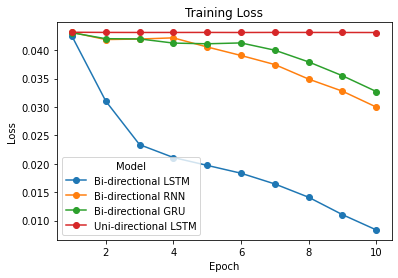

The best performing model utilised the LSTM structure, while GRU and RNN demonstrated similar performance and a uni-directional LSTM was significantly worst than all other models.. Out of the neural network architectures, the bi-directional LSTM is the most complex and utilises input and forget gate which enable it to perform better on data of longer lengths by choosing which information to presrve and forget. It is likely that the sequence length may have also influenced the performance. In this section, the training and test data was padded to the maximum length in the training set. With the maximum length, models other than the bi-directional LSTM would be prone to issues of exploding/vanishing gradients.

Of note, it is surprising that the bi-directional GRU performed worse than the bi-directional RNN. The structure of a GRU should enable it to retain some information from previous input and as such perform better than an RNN. The poorer performance may be due to the simpler structure and fewer parameters in the GRU structure which may not be suitable for this task. It is possible that with more epochs, that the performance of the GRU may surpass the RNN.

Training Bi-directional LSTM
------------------------------
Epoch 1 of 10 | Time = 27.01s
Train Loss: 0.0425, Train Acc: 56.76%
Epoch 2 of 10 | Time = 27.31s
Train Loss: 0.0310, Train Acc: 75.83%
Epoch 3 of 10 | Time = 27.05s
Train Loss: 0.0234, Train Acc: 84.54%
Epoch 4 of 10 | Time = 27.77s
Train Loss: 0.0211, Train Acc: 85.82%
Epoch 5 of 10 | Time = 28.04s
Train Loss: 0.0197, Train Acc: 87.13%
Epoch 6 of 10 | Time = 28.36s
Train Loss: 0.0183, Train Acc: 88.22%
Epoch 7 of 10 | Time = 28.70s
Train Loss: 0.0164, Train Acc: 89.34%
Epoch 8 of 10 | Time = 28.95s
Train Loss: 0.0141, Train Acc: 91.37%
Epoch 9 of 10 | Time = 28.05s
Train Loss: 0.0110, Train Acc: 93.30%
Epoch 10 of 10 | Time = 27.62s
Train Loss: 0.0084, Train Acc: 95.50%
Test Evaluation
------------------------------
Correct Predictions: 725 / 867

              precision    recall  f1-score   support

           0     0.8421    0.8565    0.8493       467
           1     0.8291    0.8125    0.8207       400

    accuracy    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,F1 (%)
0,Bi-directional LSTM,83.608512
1,Bi-directional RNN,57.962479
2,Bi-directional GRU,54.449677
3,Uni-directional LSTM,37.712804


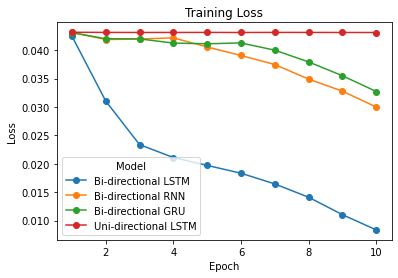

In [ ]:
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from google.colab import drive
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import classification_report
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import time
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Load the processed training and test data. 
training_A4_id = '1-H5zmJ3mHqGromgBUMb2jf1stHE0yQ6I'
testing_A4_id = '1-OgyjUXyCVyoVWNT4IVsS8KNXbGwPkS-'
for id,name in ((training_A4_id,'training_A4.pickle'), (testing_A4_id, 'testing_A4.pickle')):
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile(name)

training = load_pickle('training_A4.pickle')
testing = load_pickle('testing_A4.pickle')

vocab_list = make_vocab_list(training)
# Create the word index dictionary
word_index = make_index_dict(vocab_list)

# Load the best word embedding combination from Section 4.3
load_embedding_table = True
if load_embedding_table:
  embedding_table_id = '1h25R8UxqGxo2ErhcK5txJTAvvR4UHnfB'
  embedding_table_name = 'embedding_table.pickle'
  downloaded = drive.CreateFile({'id':embedding_table_id}) 
  downloaded.GetContentFile(embedding_table_name)
  embedding_table = load_pickle('embedding_table.pickle')  
else:
  load_preprocessed_text_id = '1-9uhjjbXpqPRmXMgDQkTcNX8LEHMoekV' #Load the preprocessed text for word embedding training
  downloaded = drive.CreateFile({'id':load_preprocessed_text_id})
  downloaded.GetContentFile('x_word_emb.pickle')
  x_word_emb = load_pickle('x_word_emb.pickle')
  window_size = 10  
  vec_dim = 100
  emb1 = Word2Vec(sentences = x_word_emb, size = vec_dim, window = window_size, sg = 0, workers=4) #Training a Word2Vec CBOW
  emb2 = api.load("glove-twitter-100") 
  total_emb_dim = emb1.vector_size + emb2.vector_size
  embedding_table = embedding_lookup(emb1, emb2, total_emb_dim, vocab_list)

# Encoding and padding of training and test data
train_len_list = [len(s) for s in training]
seq_length = max(train_len_list)
train_encoded = encode_pad(training, seq_length, word_index)
test_encoded = encode_pad(testing, seq_length, word_index)

vocab_size = len(vocab_list)

# Model Classes and Parameters
# Parameters
n_class = 2
n_hidden = 100
learning_rate = 0.001
epochs = 10
display_interval = 1  
batch_size = 16
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# LSTM
class Bi_LSTM_Emb(nn.Module):
    def __init__(self, vocab_size, embedding_table):
        super(Bi_LSTM_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, total_emb_dim)
        self.emb.weight.data.copy_(torch.from_numpy(embedding_table))
        self.emb.weight.requires_grad = False

        self.lstm = nn.LSTM(total_emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)

    def forward(self, x):
        x = self.emb(x)                
        lstm_out, (h_n, c_n) = self.lstm(x)
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z

class Uni_LSTM_Emb(nn.Module):
    def __init__(self, vocab_size, embedding_table):
        super(Uni_LSTM_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, total_emb_dim)
        self.emb.weight.data.copy_(torch.from_numpy(embedding_table))
        self.emb.weight.requires_grad = False

        self.lstm = nn.LSTM(total_emb_dim, n_hidden, batch_first =True, bidirectional=False)
        self.linear = nn.Linear(n_hidden, n_class)

    def forward(self, x):
        x = self.emb(x)                
        lstm_out, (h_n, c_n) = self.lstm(x)
        x_last = lstm_out[:,-1,:]         
        z = self.linear(x_last)
        return z


class Bi_RNN_Emb(nn.Module):
    def __init__(self, vocab_size, embedding_table):
        super(Bi_RNN_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, total_emb_dim)
        self.emb.weight.data.copy_(torch.from_numpy(embedding_table))
        self.emb.weight.requires_grad = False

        self.rnn = nn.RNN(total_emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)

    def forward(self, x):
        x = self.emb(x)                
        rnn_out, h_n = self.rnn(x)
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z

class Bi_GRU_Emb(nn.Module):
    def __init__(self, vocab_size, embedding_table):
        super(Bi_GRU_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, total_emb_dim)
        self.emb.weight.data.copy_(torch.from_numpy(embedding_table))
        self.emb.weight.requires_grad = False

        self.gru = nn.RNN(total_emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)

    def forward(self, x):
        x = self.emb(x)                
        gru_out, h_n = self.gru(x)
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z
section_4_4_list = []
train_loss_list = []
model_names = ('Bi-directional LSTM', 'Bi-directional RNN', 'Bi-directional GRU', 'Uni-directional LSTM')
for _model, text in ((Bi_LSTM_Emb,model_names[0]), 
                    (Bi_RNN_Emb, model_names[1]), 
                    (Bi_GRU_Emb, model_names[2]),
                    (Uni_LSTM_Emb, model_names[3])):
  
  train_loss = []
  print(f"Training {text}")
  print('-'*30)
  model = _model(vocab_size, embedding_table).to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)
  input_torch = torch.from_numpy(np.array(train_encoded)).to(device)
  target_torch = torch.from_numpy(np.array(y_train_encoded)).view(-1).to(device)
  train_data = TensorDataset(input_torch, target_torch)
  train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)
  for epoch in range(epochs):
    train_running_loss = 0.0
    
    target_count = 0
    train_correct = 0 
    start_time = time.time()
    for sentence, target in train_loader:
      sentence = sentence.to(device)
      target = target.to(device)
      temp_batch_size = sentence.shape[0]
      model.train()
      optimizer.zero_grad()
      outputs = model(sentence)
      loss = criterion(outputs, target)  
      loss.backward()
      optimizer.step()
      train_running_loss += loss.item()
      preds = torch.argmax(outputs.data, -1)
      end_time = time.time()
      elapsed_time = end_time - start_time
      target_count += sentence.size(0)
      train_correct += (preds.cpu().numpy() == target.cpu().numpy()).sum().item()    
      acc_now = train_correct/target_count * 100
      loss_now = train_running_loss / target_count

    if epoch%display_interval == display_interval-1:
      print(f"Epoch {epoch+1} of {epochs} | Time = {elapsed_time :.2f}s")
      print(f"Train Loss: {loss_now:.4f}, Train Acc: {acc_now:.2f}%")
      train_loss.append(loss_now)
  train_loss_list.append(train_loss)
  test_torch = torch.from_numpy(np.array(test_encoded))
  test_data = TensorDataset(test_torch, torch.from_numpy(np.array(y_test_encoded)))
  test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle =False)
  temp_predictions = []
  test_correct = 0 
  total = 0 
  model.eval()
  with torch.no_grad():
    for sentence, target in test_loader:
      sentence = sentence.to(device)
      target = target.to(device)
      outputs = model(sentence)
      predicted = torch.argmax(outputs.data, -1)
      temp_predictions.append(predicted.cpu().numpy())
      total += target.size(0)
      test_correct += (predicted.cpu().numpy() == target.cpu().numpy()).sum().item()  
  test_predictions = []
  for batch in temp_predictions:
    for pred in batch:
      test_predictions.append(pred)
  print("Test Evaluation")
  print('-'*30)      
  print(f'Correct Predictions: {test_correct} / {total}')
  print('\n' + classification_report(y_test_encoded, test_predictions, digits = 4) +'\n' )
  f1_4_4= f1_score(y_test_encoded, test_predictions, average= 'weighted')* 100
  section_4_4_list.append(f1_4_4)
results_dict_4_4 = {'Model': model_names, 
                'F1 (%)': section_4_4_list}
from IPython.display import display
results_df_4_4 = pd.DataFrame(results_dict_4_4)
display(results_df_4_4)
print()
import matplotlib.pyplot as plt
plt.plot(range(1,epochs+1), train_loss_list[0], label = model_names[0], marker = 'o')
plt.plot(range(1,epochs+1), train_loss_list[1], label = model_names[1], marker = 'o')
plt.plot(range(1,epochs+1), train_loss_list[2], label = model_names[2], marker = 'o')
plt.plot(range(1,epochs+1), train_loss_list[3], label = model_names[3], marker = 'o')
plt.title("Training Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(title = 'Model')
plt.show()

## 4.5. HyperParameter Testing
*You are required to draw a graph(y-axis: f1, x-axis: epoch) for test set and explain the optimal number of epochs based on the learning rate you have already chosen.* Note that it will not be marked if you do not display it in the ipynb file.


In this section, hyperparameters for training the model will be investigated. Thus far, the maximum length of the training data has been used as the sequence length when encoding the training data in the previous sections. When plotting the distribution of post lengths in the training set, it can be seen that a sequence length of 700 would cover the majority of training data and reduce the amount of padding required. When comparing the maximum sequence length (~838) vs 700 over 10 epochs, the maximum sequence length produced a greater F1-score for this task. This may suggest that the longer posts may contribute to discerning between "Thinking-Feeling" labels. The maximum sequence length for padding be used for the final model. 

The second parameter investigated for model training was batch-size. The batch-size of 16 used so far has provided high F1-scores. Additional batch-sizes of 8 and 32 are evaluated to see if there are any gains in F1 score with a smaller batch-size or if a larger batch-size would produce similar results but with faster training times. 
\begin{array}{|c||c|} \hline
\text{Batch Size} & \text{F1 Score (%)} \\ \hline
\text{8} & 85.54 \\ 
\text{16} & 85.71 \\ 
\text{32} & 74.62 \\ 
\hline
\end{array}
Overall, the batch-size of 16 provided the best compromise of training time and F1 score for this task.

Lastly, the following learning rate and number of epochs were investigated for the optimal parameters:
* Learning rates: 0.01, 0.001, 0.0001
* Number of training epochs: 10, 20, 30, 40, 50

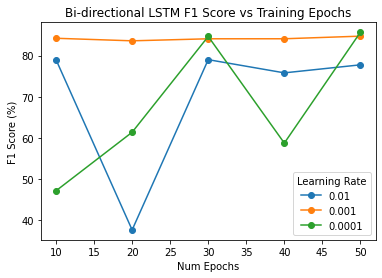

The same model parameters as previously was applied. The learning rate of 0.001 performed the best at all epochs and the optimal number of epochs for it was 10. The other learning rates were not as stable, with the smallest learning rate, 0.0001 achieving comparable F1 scores to 0.001 but at the cost of requiring more training epochs. 


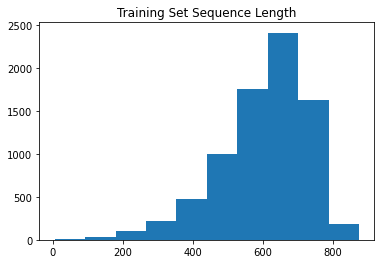

Training Maximum Seq Length
------------------------------
Epoch 1 of 10 | Time = 29.67s
Train Loss: 0.0411, Train Acc: 60.54%
Epoch 2 of 10 | Time = 30.58s
Train Loss: 0.0402, Train Acc: 63.86%
Epoch 3 of 10 | Time = 30.73s
Train Loss: 0.0268, Train Acc: 81.62%
Epoch 4 of 10 | Time = 30.56s
Train Loss: 0.0223, Train Acc: 85.16%
Epoch 5 of 10 | Time = 30.37s
Train Loss: 0.0213, Train Acc: 86.08%
Epoch 6 of 10 | Time = 30.78s
Train Loss: 0.0197, Train Acc: 87.21%
Epoch 7 of 10 | Time = 30.58s
Train Loss: 0.0181, Train Acc: 88.41%
Epoch 8 of 10 | Time = 29.98s
Train Loss: 0.0166, Train Acc: 88.83%
Epoch 9 of 10 | Time = 30.19s
Train Loss: 0.0144, Train Acc: 91.03%
Epoch 10 of 10 | Time = 30.56s
Train Loss: 0.0118, Train Acc: 93.03%
Test Evaluation
------------------------------
Correct Predictions: 733 / 867

              precision    recall  f1-score   support

           0     0.8323    0.8929    0.8616       467
           1     0.8634    0.7900    0.8251       400

    accuracy     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1 of 30 | Time = 29.81s
Train Loss: 0.0384, Train Acc: 63.70%
Epoch 2 of 30 | Time = 30.10s
Train Loss: 0.0268, Train Acc: 82.79%
Epoch 3 of 30 | Time = 29.51s
Train Loss: 0.0256, Train Acc: 83.53%
Epoch 4 of 30 | Time = 29.64s
Train Loss: 0.0235, Train Acc: 85.34%
Epoch 5 of 30 | Time = 30.00s
Train Loss: 0.0227, Train Acc: 85.53%
Epoch 6 of 30 | Time = 29.51s
Train Loss: 0.0216, Train Acc: 86.68%
Epoch 7 of 30 | Time = 29.59s
Train Loss: 0.0193, Train Acc: 87.65%
Epoch 8 of 30 | Time = 29.86s
Train Loss: 0.0182, Train Acc: 88.51%
Epoch 9 of 30 | Time = 29.69s
Train Loss: 0.0163, Train Acc: 90.38%
Epoch 10 of 30 | Time = 29.78s
Train Loss: 0.0163, Train Acc: 89.89%
Epoch 11 of 30 | Time = 29.58s
Train Loss: 0.0157, Train Acc: 90.32%
Epoch 12 of 30 | Time = 29.75s
Train Loss: 0.0138, Train Acc: 91.64%
Epoch 13 of 30 | Time = 29.86s
Train Loss: 0.0128, Train Acc: 91.94%
Epoch 14 of 30 | Time = 29.97s
Train Loss: 0.0140, Train Acc: 91.41%
Epoch 15 of 30 | Time = 29.43s
Train Loss: 

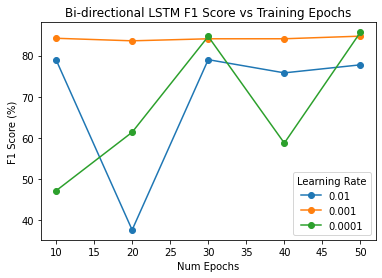

In [ ]:
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from google.colab import drive
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import classification_report
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import time
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Loading the input

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Load the processed training and test data. 
training_A4_id = '1-H5zmJ3mHqGromgBUMb2jf1stHE0yQ6I'
testing_A4_id = '1-OgyjUXyCVyoVWNT4IVsS8KNXbGwPkS-'
for id,name in ((training_A4_id,'training_A4.pickle'), (testing_A4_id, 'testing_A4.pickle')):
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile(name)

training = load_pickle('training_A4.pickle')
testing = load_pickle('testing_A4.pickle')

vocab_list = make_vocab_list(training)
# Create the word index dictionary
word_index = make_index_dict(vocab_list)

# Load the best word embedding combination from Section 4.3
load_embedding_table = True
if load_embedding_table:
  embedding_table_id = '1h25R8UxqGxo2ErhcK5txJTAvvR4UHnfB'
  embedding_table_name = 'embedding_table.pickle'
  downloaded = drive.CreateFile({'id':embedding_table_id}) 
  downloaded.GetContentFile(embedding_table_name)
  embedding_table = load_pickle('embedding_table.pickle')  
else:
  load_preprocessed_text_id = '1-9uhjjbXpqPRmXMgDQkTcNX8LEHMoekV' #Load the preprocessed text for word embedding training
  downloaded = drive.CreateFile({'id':load_preprocessed_text_id})
  downloaded.GetContentFile('x_word_emb.pickle')
  x_word_emb = load_pickle('x_word_emb.pickle')
  window_size = 10  
  vec_dim = 100
  emb1 = Word2Vec(sentences = x_word_emb, size = vec_dim, window = window_size, sg = 0, workers=4) #Training a Word2Vec CBOW
  emb2 = api.load("glove-twitter-100") 
  total_emb_dim = emb1.vector_size + emb2.vector_size
  embedding_table = embedding_lookup(emb1, emb2, total_emb_dim, vocab_list)

#Model
class Bi_LSTM_Emb(nn.Module):
    def __init__(self, vocab_size, embedding_table):
        super(Bi_LSTM_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, total_emb_dim)
        self.emb.weight.data.copy_(torch.from_numpy(embedding_table))
        self.emb.weight.requires_grad = False

        self.lstm = nn.LSTM(total_emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)

    def forward(self, x):
        x = self.emb(x)                
        lstm_out, (h_n, c_n) = self.lstm(x)
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z


'''
Hyperparameter variation 1: Changing sequence length for input padding
'''
# Model parameters for this evaluation
n_class = 2
n_hidden = 100
learning_rate = 0.001
epochs = 10
display_interval = 1  
batch_size = 16
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_len_list = [len(s) for s in training]
plt.hist(train_len_list)
plt.title("Training Set Sequence Length")
plt.show()

seq_length_1 = max(train_len_list)
seq_length_2 = 700
best_f1 = 0 
best_seq_length = 0
for seq, text in ((seq_length_1, 'Maximum Seq Length'), (seq_length_2, 'Seq Length = 700')):
  train_encoded = encode_pad(training, seq, word_index)
  test_encoded = encode_pad(testing, seq, word_index)
  vocab_size = len(vocab_list)
  print(f"Training {text}")
  print('-'*30)
  model = Bi_LSTM_Emb(vocab_size, embedding_table).to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)
  input_torch = torch.from_numpy(np.array(train_encoded)).to(device)
  target_torch = torch.from_numpy(np.array(y_train_encoded)).view(-1).to(device)
  train_data = TensorDataset(input_torch, target_torch)
  train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)
  for epoch in range(epochs):
    train_running_loss = 0.0
    
    target_count = 0
    train_correct = 0 
    start_time = time.time()
    for sentence, target in train_loader:
      sentence = sentence.to(device)
      target = target.to(device)
      temp_batch_size = sentence.shape[0]
      model.train()
      optimizer.zero_grad()
      outputs = model(sentence)
      loss = criterion(outputs, target)  
      loss.backward()
      optimizer.step()
      train_running_loss += loss.item()
      preds = torch.argmax(outputs.data, -1)
      end_time = time.time()
      elapsed_time = end_time - start_time
      target_count += sentence.size(0)
      train_correct += (preds.cpu().numpy() == target.cpu().numpy()).sum().item()    
      acc_now = train_correct/target_count * 100
      loss_now = train_running_loss / target_count

    if epoch%display_interval == display_interval-1:
      print(f"Epoch {epoch+1} of {epochs} | Time = {elapsed_time :.2f}s")
      print(f"Train Loss: {loss_now:.4f}, Train Acc: {acc_now:.2f}%")

  test_torch = torch.from_numpy(np.array(test_encoded))
  test_data = TensorDataset(test_torch, torch.from_numpy(np.array(y_test_encoded)))
  test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle =False)
  temp_predictions = []
  test_correct = 0 
  total = 0 
  model.eval()
  with torch.no_grad():
    for sentence, target in test_loader:
      sentence = sentence.to(device)
      target = target.to(device)
      outputs = model(sentence)
      predicted = torch.argmax(outputs.data, -1)
      temp_predictions.append(predicted.cpu().numpy())
      total += target.size(0)
      test_correct += (predicted.cpu().numpy() == target.cpu().numpy()).sum().item()  
  test_predictions = []
  for batch in temp_predictions:
    for pred in batch:
      test_predictions.append(pred)
  print("Test Evaluation")
  print('-'*30)      
  print(f'Correct Predictions: {test_correct} / {total}')
  print('\n' + classification_report(y_test_encoded, test_predictions, digits = 4) +'\n' )
  f1score= f1_score(y_test_encoded, test_predictions, average= 'weighted')* 100  
  if f1score >= best_f1:
    best_f1 = f1score
    best_seq_length = seq

'''
Hyperparameter variation 2: Changing batch-size
'''
n_class = 2
n_hidden = 100
learning_rate = 0.001
epochs = 10
display_interval = 1  
seq_length = best_seq_length
batch_size1 = 8
batch_size2 = 16
batch_size3 = 32
best_batchsize = 0
best_f1 = 0 

for batch in (batch_size1, batch_size2, batch_size3):
  train_encoded = encode_pad(training, seq_length, word_index)
  test_encoded = encode_pad(testing, seq_length, word_index)
  vocab_size = len(vocab_list)
  print(f"Training batch-size = {batch}")
  print('-'*30)
  model = Bi_LSTM_Emb(vocab_size, embedding_table).to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)
  input_torch = torch.from_numpy(np.array(train_encoded)).to(device)
  target_torch = torch.from_numpy(np.array(y_train_encoded)).view(-1).to(device)
  train_data = TensorDataset(input_torch, target_torch)
  train_loader = DataLoader(dataset = train_data, batch_size = batch, shuffle = True)
  for epoch in range(epochs):
    train_running_loss = 0.0
    
    target_count = 0
    train_correct = 0 
    start_time = time.time()
    for sentence, target in train_loader:
      sentence = sentence.to(device)
      target = target.to(device)
      temp_batch_size = sentence.shape[0]
      model.train()
      optimizer.zero_grad()
      outputs = model(sentence)
      loss = criterion(outputs, target)  
      loss.backward()
      optimizer.step()
      train_running_loss += loss.item()
      preds = torch.argmax(outputs.data, -1)
      end_time = time.time()
      elapsed_time = end_time - start_time
      target_count += sentence.size(0)
      train_correct += (preds.cpu().numpy() == target.cpu().numpy()).sum().item()    
      acc_now = train_correct/target_count * 100
      loss_now = train_running_loss / target_count

    if epoch%display_interval == display_interval-1:
      print(f"Epoch {epoch+1} of {epochs} | Time = {elapsed_time :.2f}s")
      print(f"Train Loss: {loss_now:.4f}, Train Acc: {acc_now:.2f}%")
      train_loss.append(loss_now)
  test_torch = torch.from_numpy(np.array(test_encoded))
  test_data = TensorDataset(test_torch, torch.from_numpy(np.array(y_test_encoded)))
  test_loader = DataLoader(dataset = test_data, batch_size = batch, shuffle =False)
  temp_predictions = []
  test_correct = 0 
  total = 0 
  model.eval()
  with torch.no_grad():
    for sentence, target in test_loader:
      sentence = sentence.to(device)
      target = target.to(device)
      outputs = model(sentence)
      predicted = torch.argmax(outputs.data, -1)
      temp_predictions.append(predicted.cpu().numpy())
      total += target.size(0)
      test_correct += (predicted.cpu().numpy() == target.cpu().numpy()).sum().item()  
  test_predictions = []
  for _ in temp_predictions:
    for pred in _:
      test_predictions.append(pred)
  print("Test Evaluation")
  print('-'*30)      
  print(f'Correct Predictions: {test_correct} / {total}')
  print('\n' + classification_report(y_test_encoded, test_predictions, digits = 4) +'\n' )
  f1score= f1_score(y_test_encoded, test_predictions, average= 'weighted')* 100
  if f1score >= best_f1:
    best_f1 = f1score
    best_batchsize = batch


'''
Hyperparameter variation 3: Varying epochs and learning rate. 
'''
n_class = 2
seq_length = best_seq_length
batch_size = best_batchsize
display_interval = 1  
best_f1 = 0 
section_4_5_list = []
learning_rate_list = [0.01,0.001,0.0001]
epoch_list = [10,20,30,40, 50]
for learning_rate in learning_rate_list:
  temp_list = []
  print(f"Evaluating learning rate = {learning_rate}")
  for epochs in epoch_list:  
    train_loss = []
    print('-'*30)
    model = Bi_LSTM_Emb(vocab_size, embedding_table).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    input_torch = torch.from_numpy(np.array(train_encoded)).to(device)
    target_torch = torch.from_numpy(np.array(y_train_encoded)).view(-1).to(device)
    train_data = TensorDataset(input_torch, target_torch)
    train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)
    for epoch in range(epochs):
      train_running_loss = 0.0
      
      target_count = 0
      train_correct = 0 
      start_time = time.time()
      for sentence, target in train_loader:
        sentence = sentence.to(device)
        target = target.to(device)
        temp_batch_size = sentence.shape[0]
        model.train()
        optimizer.zero_grad()
        outputs = model(sentence)
        loss = criterion(outputs, target)  
        loss.backward()
        optimizer.step()
        train_running_loss += loss.item()
        preds = torch.argmax(outputs.data, -1)
        end_time = time.time()
        elapsed_time = end_time - start_time
        target_count += sentence.size(0)
        train_correct += (preds.cpu().numpy() == target.cpu().numpy()).sum().item()    
        acc_now = train_correct/target_count * 100
        loss_now = train_running_loss / target_count

      if epoch%display_interval == display_interval-1:
        print(f"Epoch {epoch+1} of {epochs} | Time = {elapsed_time :.2f}s")
        print(f"Train Loss: {loss_now:.4f}, Train Acc: {acc_now:.2f}%")
        train_loss.append(loss_now)
        # train_accuracy.append(acc_now)
    # model_fname = 
    # torch.save(model, model_fname)
    train_loss_list.append(train_loss)
    test_torch = torch.from_numpy(np.array(test_encoded))
    test_data = TensorDataset(test_torch, torch.from_numpy(np.array(y_test_encoded)))
    test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle =False)
    temp_predictions = []
    test_correct = 0 
    total = 0 
    model.eval()
    with torch.no_grad():
      for sentence, target in test_loader:
        sentence = sentence.to(device)
        target = target.to(device)
        outputs = model(sentence)
        predicted = torch.argmax(outputs.data, -1)
        temp_predictions.append(predicted.cpu().numpy())
        total += target.size(0)
        test_correct += (predicted.cpu().numpy() == target.cpu().numpy()).sum().item()  
    test_predictions = []
    for batch in temp_predictions:
      for pred in batch:
        test_predictions.append(pred)
    print("Test Evaluation")
    print('-'*30)      
    print(f'Correct Predictions: {test_correct} / {total}')
    print('\n' + classification_report(y_test_encoded, test_predictions, digits = 4) +'\n' )
    f1scores = f1_score(y_test_encoded, test_predictions, average= 'weighted')* 100
    temp_list.append(f1scores)
  section_4_5_list.append(temp_list)

import matplotlib.pyplot as plt
plt.plot(epoch_list, section_4_5_list[0], label = learning_rate_list[0], marker = 'o')
plt.plot(epoch_list, section_4_5_list[1], label = learning_rate_list[1], marker = 'o')
plt.plot(epoch_list, section_4_5_list[2], label = learning_rate_list[2], marker = 'o')
plt.title("Bi-directional LSTM F1 Score vs Training Epochs")
plt.ylabel("F1 Score (%)")
plt.xlabel("Num Epochs")
plt.legend(title = 'Learning Rate')
plt.show()



#5 - Test your model via Colab Form Fields User Interface

You are required to design a user interface so that user can input a textual sentence via the colab form fields user interface to get the personality type classification result from your trained model. *You can just modify based on the following Colab Form Fields template*

In [ ]:
#@title Personality Type Prediction
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem.porter import *
from nltk.corpus import stopwords as sw`
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


text = "" #@param {type:"string"}

# Encode the text and convert to tensor
stemmer = PorterStemmer()
tokenizer = WhitespaceTokenizer()
stopwords = sw.words()
# Preprocess the text for the model
text = re.sub(r"\|\|\|", " ", text.lower())
text = re.sub(r'[0-9]','', text)
text = re.sub(r'[!"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~]',' ',text) # Remove punctuation
text = tokenizer.tokenize(text)
text = [w for w in text if w not in stopwords]
text = [stemmer.stem(w) for w in text]

seq_length = 874 #Seq length based on what the model was trained on. 

#Encode and pad the text for the model
encoded = [word_index[word] if word in word_index else word_index['[UNKNOWN]'] for word in text]
if len(encoded) < seq_length:
  encoded += [word_index['[PAD]']] * (seq_length - len(encoded))
if len(encoded) > seq_length:
  encoded = encoded[:seq_length]
text_torch = torch.from_numpy(np.array([encoded])).to(device)

load_final_model = True
if load_final_model:
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)

  final_model_id = '1-rLmbTa2hTRKkaznp0TAXHASK7hC1CaD'
  downloaded = drive.CreateFile({'id':final_model_id}) 
  downloaded.GetContentFile('Final_Model.pt')

#Get the prediction
saved_model = torch.load('Final_Model.pt')
saved_model.eval()
output = saved_model(text_torch)
predicted = torch.argmax(output.data)

label_text = np.unique(training_labels)
print(f"Predicted Personality Type: {label_text[predicted.item()]}")

Predicted Personality Type: F
